In [52]:
## Quick Intro
# The problem I am exploring is people defaulting on their credit card debt. This is hugely important in the world of finance, banking, etc. because banks and people who make loans need to determine people who are likely to default.
# I will be predicting the likelihood of someone defaulting on their credit card debt.
# This data comes from a Tiawanese bank in 2005, and is distributed by the University of California in Irvine.
# The only other study I know was used on this dataset was by members of UCI on what the best model for predicting default was. Their final result was neural networks, which I did not implement, and therefore cannot dispute

# Clear environment
rm(list = ls())
set.seed(12192018)

# Read in data file
data = read.csv(file = "C:\\Users\\student\\Documents\\Applied Data Mining\\Final Project\\default of credit card clients.csv", header = TRUE)

# Remove this NULLs variable, is ID only
data$X<-NULL

# Replace names
names(data) <- c('credit', 'gender', 'education', 'maritalStatus', 'age', 'sepPaymentStatus', 'augPaymentStatus', 'julPaymentStatus', 'junPaymentStatus', 'mayPaymentStatus', 'aprPaymentStatus', 'sepBillStatement', 'augBillStatement', 'julBillStatement', 'junBillStatement', 'mayBillStatement', 'aprBillStatement', 'sepPrevBillStatement', 'augPrevBillStatement', 'julPrevBillStatement', 'junPrevBillStatement', 'mayPrevBillStatement', 'aprPrevBillStatement', 'target')


In [15]:
library(rpart)
install.packages("C50")
library(C50)
library(ggplot2)
library(glmnet)
library(ranger)
library(caret)

Installing package into 'C:/Users/student/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'C50' is in use and will not be installed"Loading required package: lattice


In [16]:
# Make odd values missing
data$education[data$education == 6]<-NA
data$education[data$education == 5]<-NA
data$education[data$education == 0]<-NA

data$maritalStatus[data$maritalStatus == 0]<-NA

data$sepPaymentStatus[data$sepPaymentStatus == -2]<-NA
data$augPaymentStatus[data$augPaymentStatus == -2]<-NA
data$julPaymentStatus[data$julPaymentStatus == -2]<-NA
data$junPaymentStatus[data$junPaymentStatus == -2]<-NA
data$mayPaymentStatus[data$mayPaymentStatus == -2]<-NA
data$aprPaymentStatus[data$aprPaymentStatus == -2]<-NA

data$sepBillStatement[data$sepBillStatement < 0]<-NA
data$augBillStatement[data$augBillStatement < 0]<-NA
data$julBillStatement[data$julBillStatement < 0]<-NA
data$junBillStatement[data$junBillStatement < 0]<-NA
data$mayBillStatement[data$mayBillStatement < 0]<-NA
data$aprBillStatement[data$aprBillStatement < 0]<-NA

data$sepPrevBillStatement[data$sepPrevBillStatement < 0]<-NA
data$augPrevBillStatement[data$augPrevBillStatement < 0]<-NA
data$julPrevBillStatement[data$julPrevBillStatement < 0]<-NA
data$junPrevBillStatement[data$junPrevBillStatement < 0]<-NA
data$mayPrevBillStatement[data$mayPrevBillStatement < 0]<-NA
data$aprPrevBillStatement[data$aprPrevBillStatement < 0]<-NA

# Make some ints factors
target.f <- factor(data$target, labels = c("No", "Yes"))
gender.f <- factor(data$gender, labels = c("M", "F"))
edu.f <- factor(data$education, labels = c("GradSchool", "University", "HighSchool", "Other"))
marital.f <- factor(data$maritalStatus, labels = c("Married", "Single", "Other"))

data$target <- target.f
data$gender <- gender.f
data$education <- edu.f
data$maritalStatus <- marital.f

In [17]:
# Under sample, will make later computations faster and will balance the data
data.no = data[data$target == 'No',]
data.yes = data[data$target == 'Yes',]
data.no.under = data.no[sample(1:nrow(data.no), nrow(data.yes)),]
data.under <- rbind(data.yes, data.no.under)

# Do imputations before binning
data.under$education[is.na(data.under$education)]<-sort(names(table(data.under$education)))[1]
data.under$maritalStatus[is.na(data.under$maritalStatus)]<-sort(names(table(data.under$maritalStatus)))[1]

# Save for later use
data.bin <- data.under
data.dummy <- data.under

+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=3 
- Fold1: mtry=2, splitrule=gini, min.node.size=3 
+ Fold2: mtry=2, splitrule=gini, min.node.size=1 
- Fold2: mtry=2, splitrule=gini, min.node.size=1 
+ Fold2: mtry=2, splitrule=gini, min.node.size=2 
- Fold2: mtry=2, splitrule=gini, min.node.size=2 
+ Fold2: mtry=2, splitrule=gini, min.node.size=3 
- Fold2: mtry=2, splitrule=gini, min.node.size=3 
+ Fold3: mtry=2, splitrule=gini, min.node.size=1 
- Fold3: mtry=2, splitrule=gini, min.node.size=1 
+ Fold3: mtry=2, splitrule=gini, min.node.size=2 
- Fold3: mtry=2, splitrule=gini, min.node.size=2 
+ Fold3: mtry=2, splitrule=gini, min.node.size=3 
- Fold3: mtry=2, splitrule=gini, min.node.size=3 
+ Fold4: mtry=2, splitrule=gini, min.node.size=1 
- Fold4: mtry=2, splitrule=gini, min.node.size=1 


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'target' is not a factor"

+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=3 
- Fold1: mtry=2, splitrule=gini, min.node.size=3 
+ Fold2: mtry=2, splitrule=gini, min.node.size=1 
- Fold2: mtry=2, splitrule=gini, min.node.size=1 
+ Fold2: mtry=2, splitrule=gini, min.node.size=2 
- Fold2: mtry=2, splitrule=gini, min.node.size=2 
+ Fold2: mtry=2, splitrule=gini, min.node.size=3 
- Fold2: mtry=2, splitrule=gini, min.node.size=3 
+ Fold3: mtry=2, splitrule=gini, min.node.size=1 
- Fold3: mtry=2, splitrule=gini, min.node.size=1 
+ Fold3: mtry=2, splitrule=gini, min.node.size=2 
- Fold3: mtry=2, splitrule=gini, min.node.size=2 
+ Fold3: mtry=2, splitrule=gini, min.node.size=3 
- Fold3: mtry=2, splitrule=gini, min.node.size=3 
+ Fold4: mtry=2, splitrule=gini, min.node.size=1 
- Fold4: mtry=2, splitrule=gini, min.node.size=1 


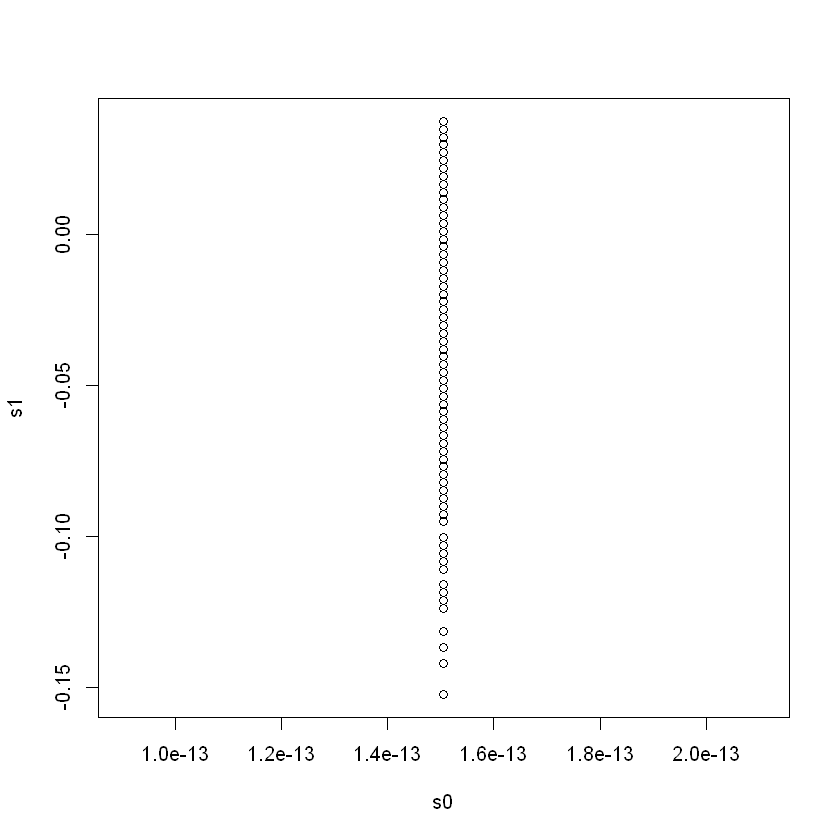

24 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.678117e-01
V1          -2.699811e-06
V2           .           
V3           .           
V4           .           
V5           .           
V6           .           
V7           .           
V8           .           
V9           .           
V10          .           
V11          .           
V12         -3.968419e-06
V13          9.139729e-07
V14          2.828620e-06
V15          1.540120e-06
V16          .           
V17          2.689238e-06
V18         -1.641346e-05
V19         -1.718603e-05
V20         -6.537036e-06
V21          2.105669e-08
V22         -6.743899e-06
V23         -5.238073e-07

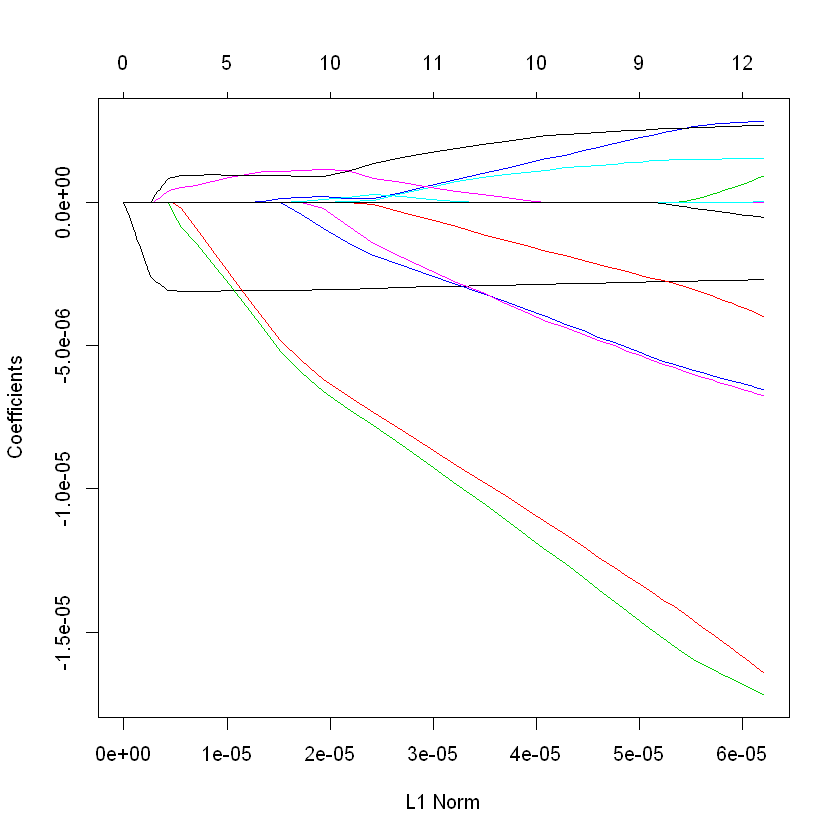

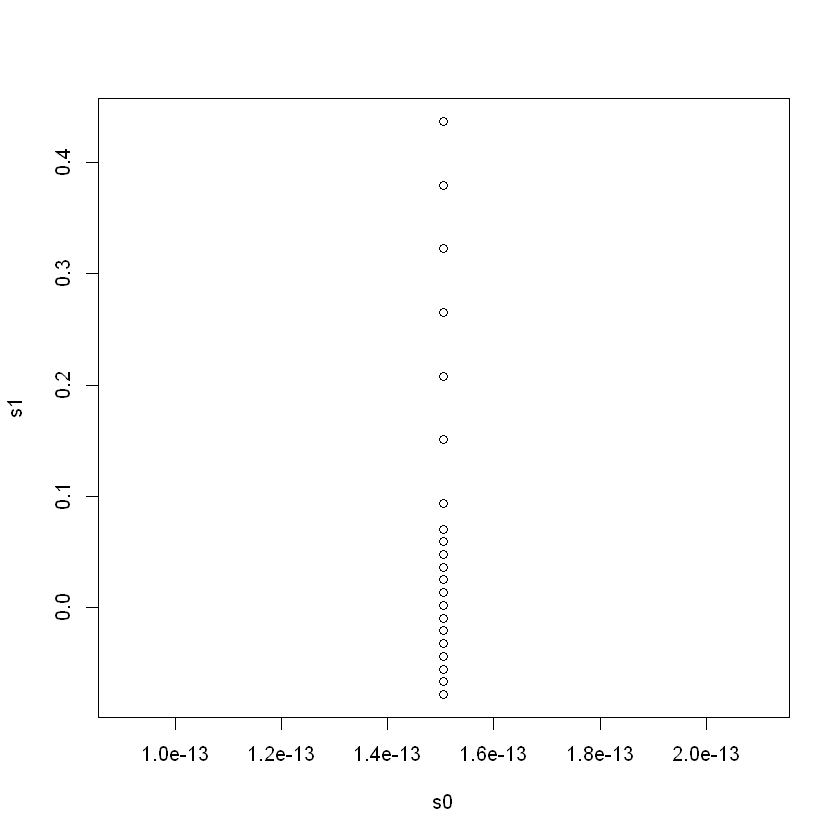

24 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.107759426
V1          -0.139184943
V2           .          
V3           .          
V4          -0.014020495
V5           0.059936012
V6           0.577289668
V7           0.148321646
V8           0.137598939
V9           0.034873597
V10          0.041330687
V11          0.033513783
V12         -0.061356199
V13          .          
V14          .          
V15          .          
V16          .          
V17          .          
V18         -0.072428733
V19         -0.067501395
V20         -0.007057523
V21          .          
V22          .          
V23          .          

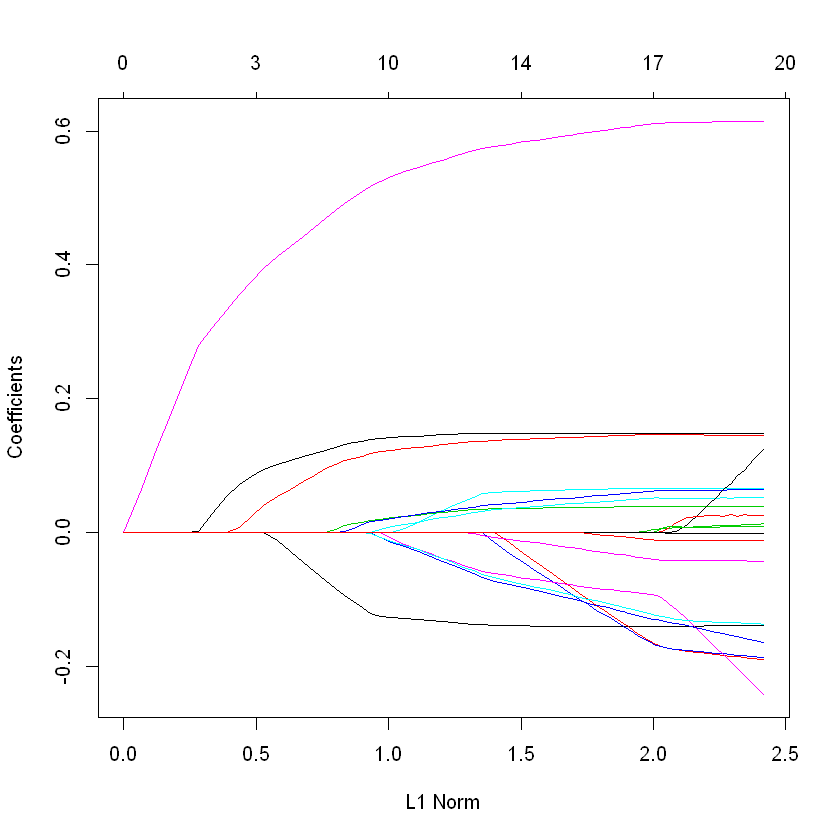

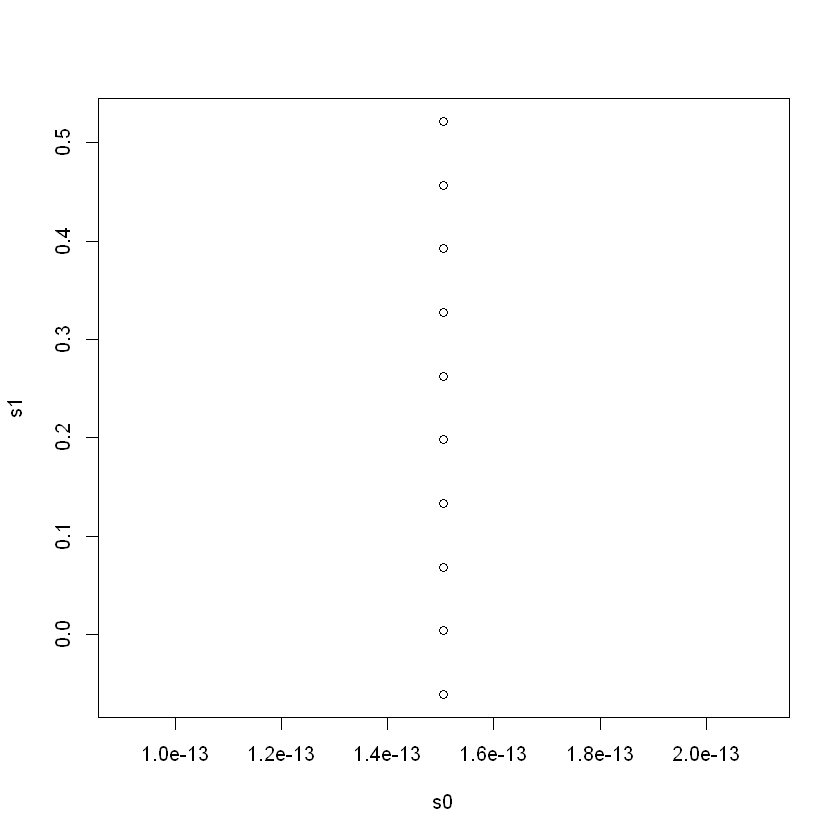

24 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.107759426
V1          -0.139184943
V2           .          
V3           .          
V4          -0.014020495
V5           0.059936012
V6           0.577289668
V7           0.148321646
V8           0.137598939
V9           0.034873597
V10          0.041330687
V11          0.033513783
V12         -0.061356199
V13          .          
V14          .          
V15          .          
V16          .          
V17          .          
V18         -0.072428733
V19         -0.067501395
V20         -0.007057523
V21          .          
V22          .          
V23          .          

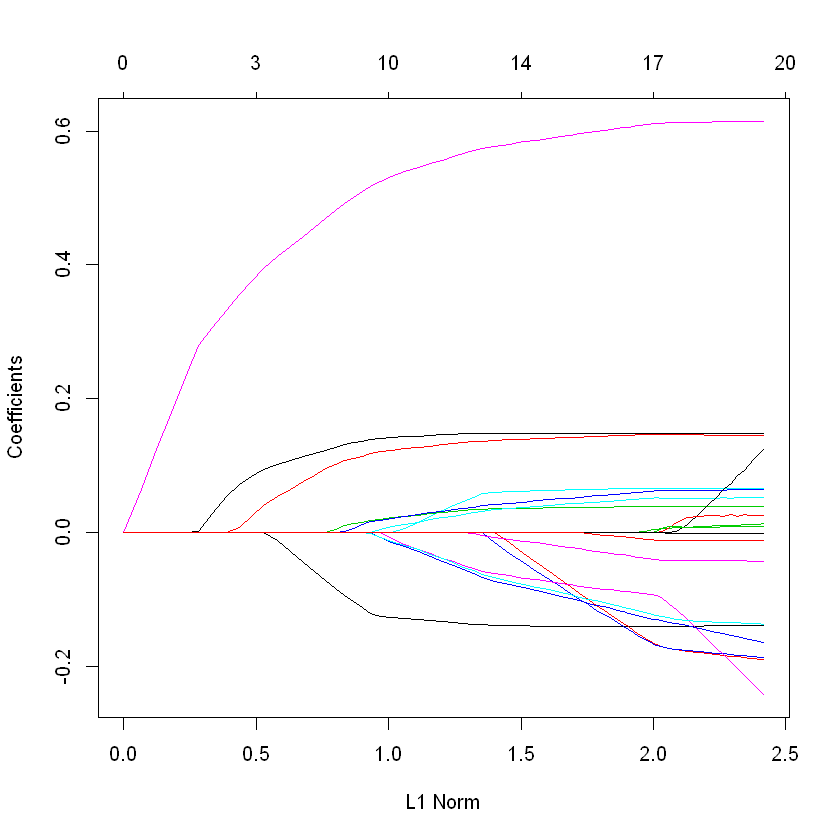

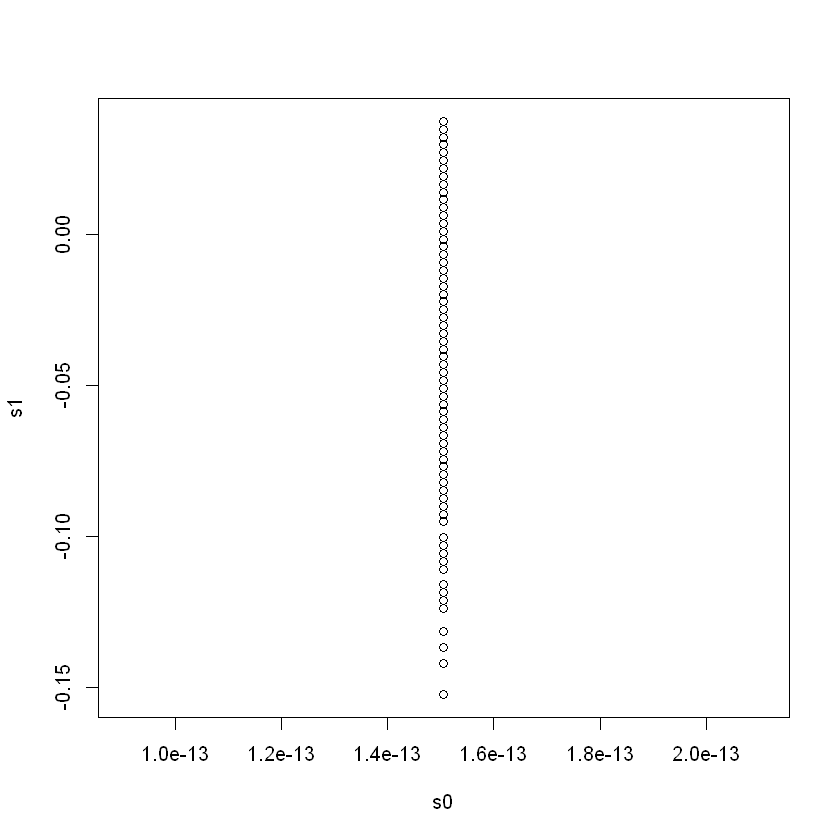

24 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.975450e-01
V1          -2.763805e-06
V2           .           
V3           .           
V4           .           
V5           .           
V6           .           
V7           .           
V8           .           
V9           .           
V10          .           
V11          .           
V12         -5.730859e-06
V13          2.803900e-06
V14          2.312966e-06
V15          7.938480e-07
V16          1.655832e-06
V17          8.089769e-07
V18         -1.845733e-05
V19         -1.988946e-05
V20         -7.619708e-06
V21          1.323572e-06
V22         -5.026856e-06
V23         -5.949492e-07

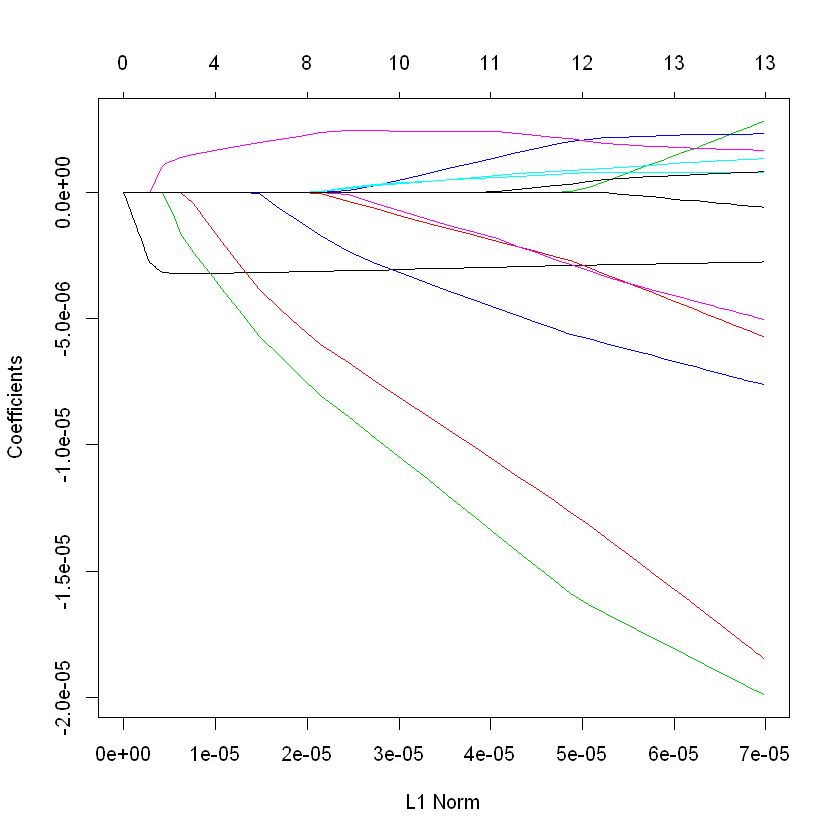

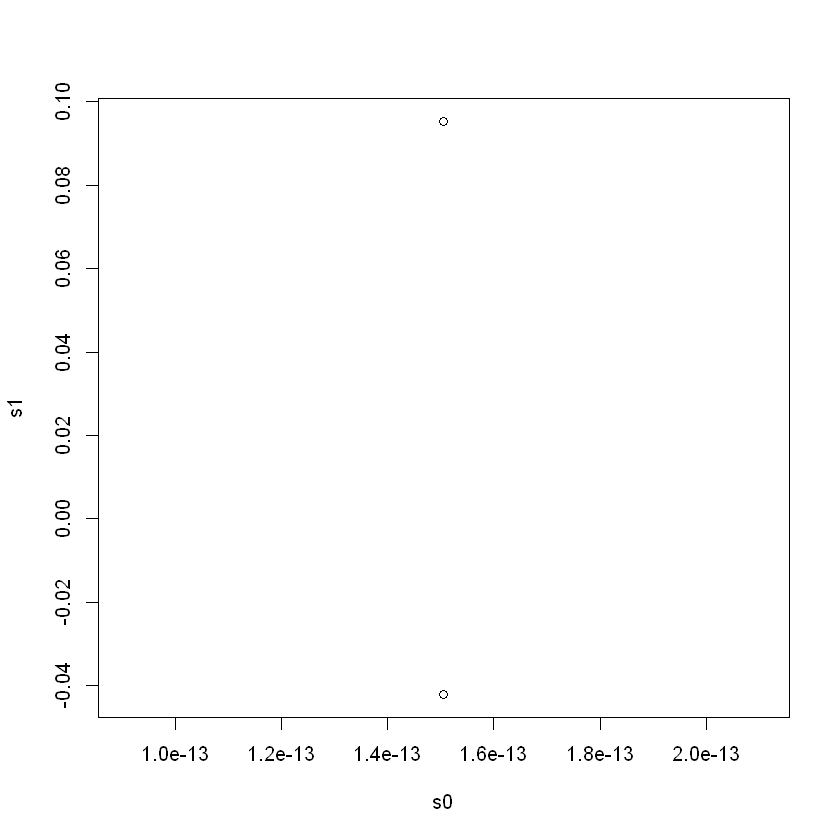

24 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.107759426
V1          -0.139184943
V2           .          
V3           .          
V4          -0.014020495
V5           0.059936012
V6           0.577289668
V7           0.148321646
V8           0.137598939
V9           0.034873597
V10          0.041330687
V11          0.033513783
V12         -0.061356199
V13          .          
V14          .          
V15          .          
V16          .          
V17          .          
V18         -0.072428733
V19         -0.067501395
V20         -0.007057523
V21          .          
V22          .          
V23          .          

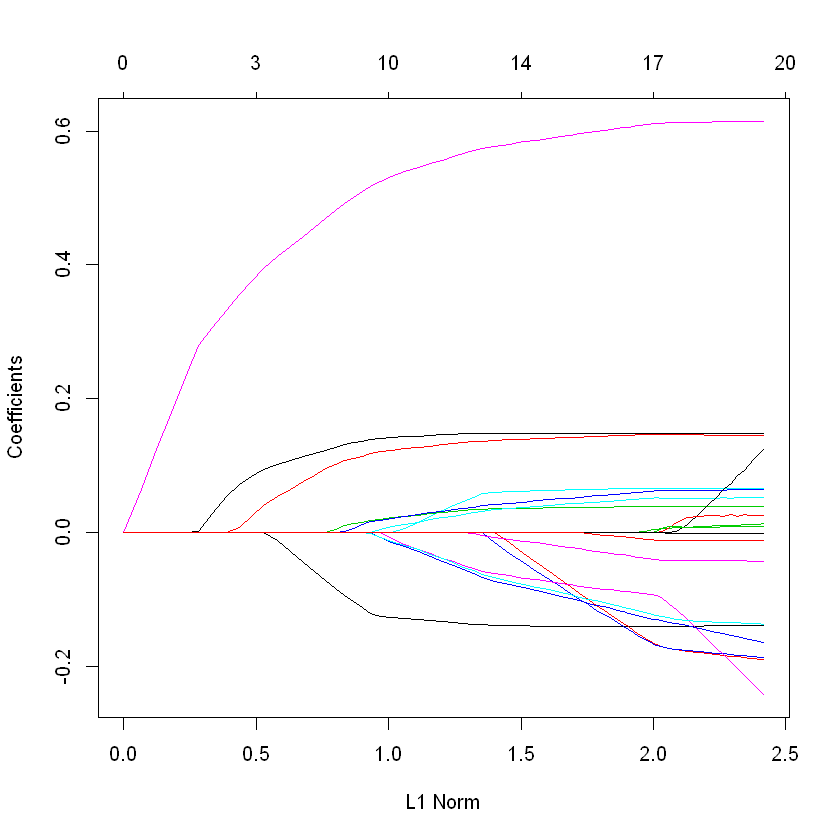

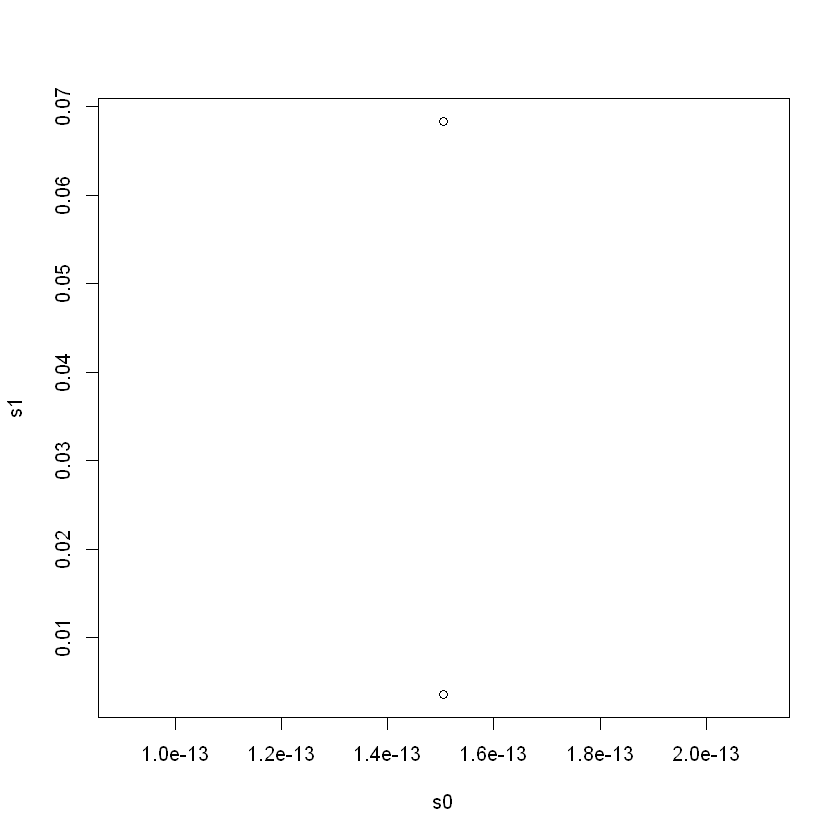

24 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.091187099
V1          -0.172259262
V2           .          
V3           .          
V4          -0.029961899
V5           0.031639978
V6           0.549025921
V7           0.064120455
V8           0.191009365
V9           0.109095978
V10          0.085222054
V11          0.097099153
V12          .          
V13          0.026474010
V14          .          
V15          .          
V16          .          
V17          .          
V18         -0.088115693
V19         -0.060848043
V20          .          
V21          .          
V22         -0.005870873
V23          .          

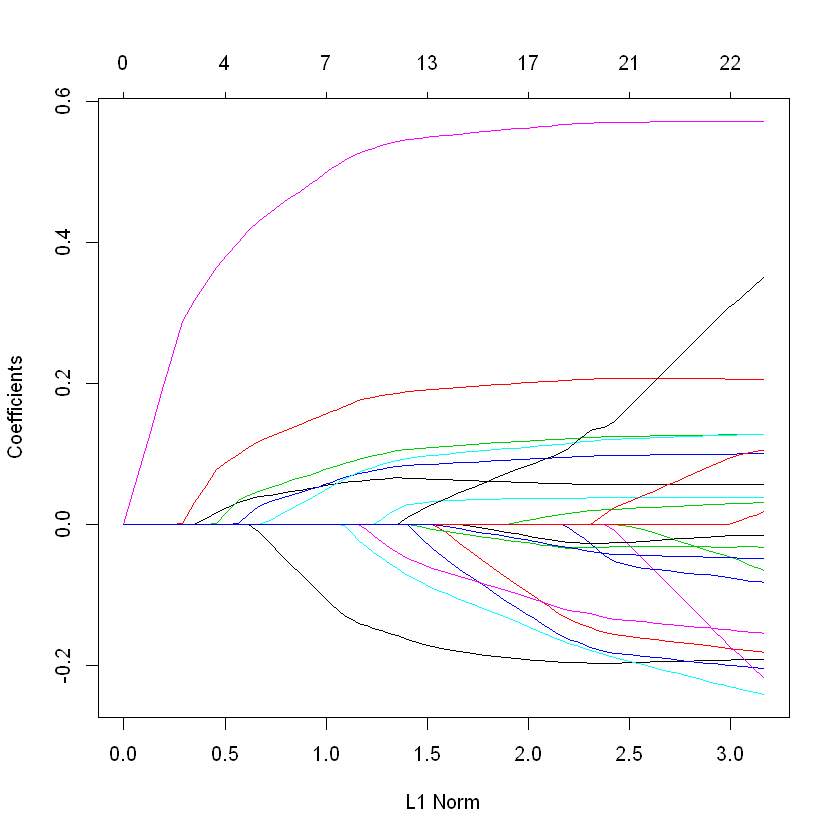

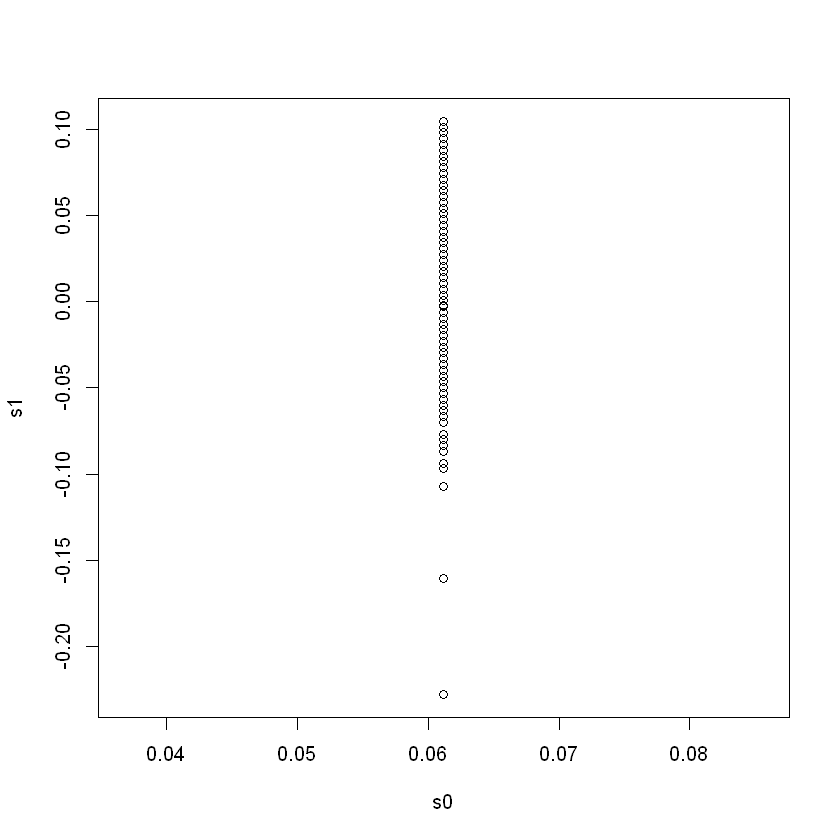

24 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.091187099
V1          -0.172259262
V2           .          
V3           .          
V4          -0.029961899
V5           0.031639978
V6           0.549025921
V7           0.064120455
V8           0.191009365
V9           0.109095978
V10          0.085222054
V11          0.097099153
V12          .          
V13          0.026474010
V14          .          
V15          .          
V16          .          
V17          .          
V18         -0.088115693
V19         -0.060848043
V20          .          
V21          .          
V22         -0.005870873
V23          .          

+ Fold01: mtry=2, splitrule=gini, min.node.size=1 
- Fold01: mtry=2, splitrule=gini, min.node.size=1 
+ Fold01: mtry=2, splitrule=extratrees, min.node.size=1 
- Fold01: mtry=2, splitrule=extratrees, min.node.size=1 
+ Fold01: mtry=2, splitrule=gini, min.node.size=2 
- Fold01: mtry=2, splitrule=gini, min.node.size=2 
+ Fold01: mtry=2, splitrule=extratrees, min.node.size=2 
- Fold01: mtry=2, splitrule=extratrees, min.node.size=2 
+ Fold01: mtry=2, splitrule=gini, min.node.size=3 
- Fold01: mtry=2, splitrule=gini, min.node.size=3 
+ Fold01: mtry=2, splitrule=extratrees, min.node.size=3 
- Fold01: mtry=2, splitrule=extratrees, min.node.size=3 
+ Fold02: mtry=2, splitrule=gini, min.node.size=1 
- Fold02: mtry=2, splitrule=gini, min.node.size=1 
+ Fold02: mtry=2, splitrule=extratrees, min.node.size=1 
- Fold02: mtry=2, splitrule=extratrees, min.node.size=1 
+ Fold02: mtry=2, splitrule=gini, min.node.size=2 
- Fold02: mtry=2, splitrule=gini, min.node.size=2 
+ Fold02: mtry=2, splitrule=extrat

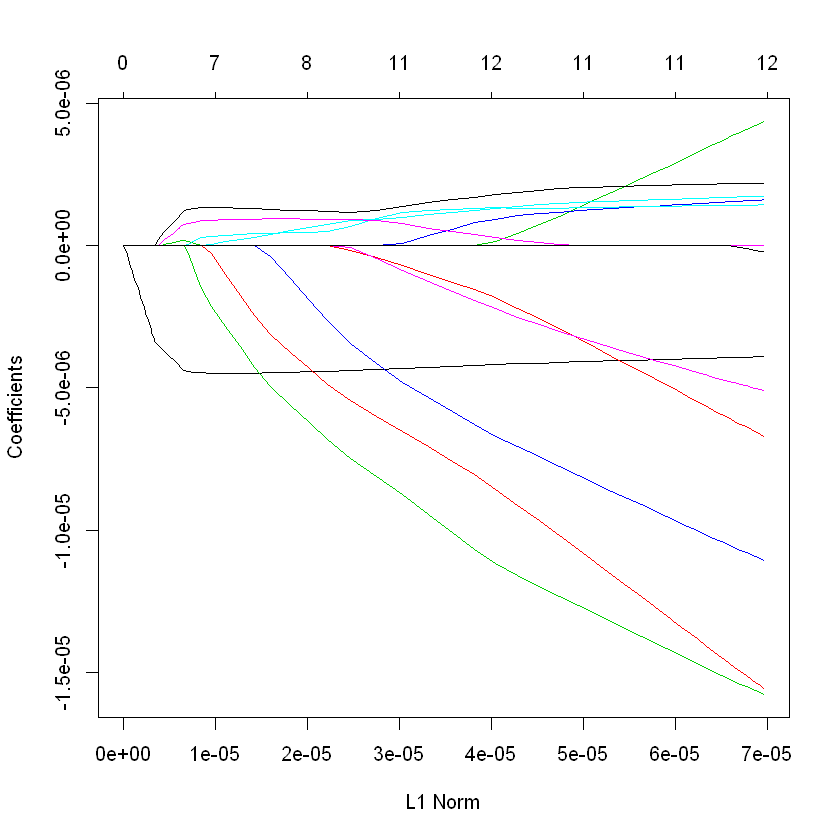

In [18]:
# Complete imputing
data.median<-predict(preProcess(data.under, method='medianImpute'), newdata = data.under) # Replaces all missing values with the median value. Can heavily skew the data
data.knn<-predict(preProcess(data.under, method='knnImpute'), newdata = data.under) # Replaces all missing values by each missing values k-nearest neighbors. k = 5 in this case, which is the default. Then centers and scales the data.
# Change to complete.cases() soon
data.complete<-data.under[complete.cases(data.under),] # Simply removes all observations with missing values

# Model Creation: Median Impute
  # Quick Clean
median.splitIndex <- createDataPartition(data.median$target, p = 0.70, list = FALSE, times = 1)
median.train <- data.median[ median.splitIndex,]
median.test  <- data.median[-median.splitIndex,]
median.train.list <- c(median.train$credit, median.train$gender, median.train$education, median.train$maritalStatus, median.train$age, median.train$sepPaymentStatus, median.train$augPaymentStatus, median.train$julPaymentStatus, median.train$junPaymentStatus, median.train$mayPaymentStatus, median.train$aprPaymentStatus, median.train$sepBillStatement, median.train$augBillStatement, median.train$julBillStatement, median.train$junBillStatement, median.train$mayBillStatement, median.train$aprBillStatement, median.train$sepPrevBillStatement, median.train$augPrevBillStatement, median.train$julPrevBillStatement, median.train$junBillStatement, median.train$mayPrevBillStatement, median.train$aprPrevBillStatement)
median.train.matrix <- matrix(median.train.list, nrow = length(median.train.list)/23, ncol = 23)
median.test.list <- c(median.test$credit, median.test$gender, median.test$education, median.test$maritalStatus, median.test$age, median.test$sepPaymentStatus, median.test$augPaymentStatus, median.test$julPaymentStatus, median.test$junPaymentStatus, median.test$mayPaymentStatus, median.test$aprPaymentStatus, median.test$sepBillStatement, median.test$augBillStatement, median.test$julBillStatement, median.test$junBillStatement, median.test$mayBillStatement, median.test$aprBillStatement, median.test$sepPrevBillStatement, median.test$augPrevBillStatement, median.test$julPrevBillStatement, median.test$junBillStatement, median.test$mayPrevBillStatement, median.test$aprPrevBillStatement)
median.test.matrix <- matrix(median.test.list, nrow = length(median.test.list)/23, ncol = 23)

  # Glmnet model
fit.median = glmnet(x = median.train.matrix, y = as.double(data.median[median.splitIndex,]$target), family = "binomial")
fit.median.predict <- predict(fit.median, newx = median.test.matrix)

  # C5.0 model
C5.0.tree.median <- C5.0(x = median.train[.1:(ncol(median.train)-1)], y = median.train$target)
C5.0.tree.median.predict <- predict(C5.0.tree.median, newdata = median.test)

  # rpart model
median.rpart <- rpart(target ~ ., data = median.train, method = "class")
median.pred <- predict(median.rpart, median.test, type = "class")
median.cm = confusionMatrix(data = median.pred, reference = (median.test$target), positive = "Yes")

  # ranger model
myGrid7median = expand.grid(mtry = 2, splitrule = ("gini"),
                           min.node.size = c(1:3))
model7median <- train(target~.,data = median.train, method = "ranger", 
                     trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                     tuneGrid = myGrid7median)


# Model Creation: Knn Impute
  # Quick Clean
knn.splitIndex <- createDataPartition(data.knn$target, p = 0.70, list = FALSE, times = 1)
knn.train <- data.knn[ knn.splitIndex,]
knn.test  <- data.knn[-knn.splitIndex,]
knn.train.list <- c(knn.train$credit, knn.train$gender, knn.train$education, knn.train$maritalStatus, knn.train$age, knn.train$sepPaymentStatus, knn.train$augPaymentStatus, knn.train$julPaymentStatus, knn.train$junPaymentStatus, knn.train$mayPaymentStatus, knn.train$aprPaymentStatus, knn.train$sepBillStatement, knn.train$augBillStatement, knn.train$julBillStatement, knn.train$junBillStatement, knn.train$mayBillStatement, knn.train$aprBillStatement, knn.train$sepPrevBillStatement, knn.train$augPrevBillStatement, knn.train$julPrevBillStatement, knn.train$junBillStatement, knn.train$mayPrevBillStatement, knn.train$aprPrevBillStatement)
knn.train.matrix <- matrix(knn.train.list, nrow = length(knn.train.list)/23, ncol = 23)
knn.test.list <- c(knn.test$credit, knn.test$gender, knn.test$education, knn.test$maritalStatus, knn.test$age, knn.test$sepPaymentStatus, knn.test$augPaymentStatus, knn.test$julPaymentStatus, knn.test$junPaymentStatus, knn.test$mayPaymentStatus, knn.test$aprPaymentStatus, knn.test$sepBillStatement, knn.test$augBillStatement, knn.test$julBillStatement, knn.test$junBillStatement, knn.test$mayBillStatement, knn.test$aprBillStatement, knn.test$sepPrevBillStatement, knn.test$augPrevBillStatement, knn.test$julPrevBillStatement, knn.test$junBillStatement, knn.test$mayPrevBillStatement, knn.test$aprPrevBillStatement)
knn.test.matrix <- matrix(knn.test.list, nrow = length(knn.test.list)/23, ncol = 23)

# Glmnet model
fit.knn = glmnet(x = knn.train.matrix, y = as.double(data.knn[knn.splitIndex,]$target), family = "binomial")
fit.knn.predict <- predict(fit.knn, newx = knn.test.matrix)

# C5.0 model
C5.0.tree.knn <- C5.0(x = knn.train[.1:(ncol(knn.train)-1)], y = knn.train$target)
C5.0.tree.knn.predict <- predict(C5.0.tree.knn, newdata = knn.test)

# rpart model
knn.rpart <- rpart(target ~ ., data = knn.train, method = "class")
knn.pred <- predict(knn.rpart, knn.test, type = "class")
knn.cm = confusionMatrix(data = knn.pred, reference = (knn.test$target), positive = "Yes")

# ranger model
myGrid7knn = expand.grid(mtry = 2, splitrule = ("gini"),
                            min.node.size = c(1:3))
model7knn <- train(target~.,data = knn.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                      tuneGrid = myGrid7knn)

# Model Creation: complete Impute
  # Quick Clean
complete.splitIndex <- createDataPartition(data.complete$target, p = 0.70, list = FALSE, times = 1)
complete.train <- data.complete[ complete.splitIndex,]
complete.test  <- data.complete[-complete.splitIndex,]
complete.train.list <- c(complete.train$credit, complete.train$gender, complete.train$education, complete.train$maritalStatus, complete.train$age, complete.train$sepPaymentStatus, complete.train$augPaymentStatus, complete.train$julPaymentStatus, complete.train$junPaymentStatus, complete.train$mayPaymentStatus, complete.train$aprPaymentStatus, complete.train$sepBillStatement, complete.train$augBillStatement, complete.train$julBillStatement, complete.train$junBillStatement, complete.train$mayBillStatement, complete.train$aprBillStatement, complete.train$sepPrevBillStatement, complete.train$augPrevBillStatement, complete.train$julPrevBillStatement, complete.train$junBillStatement, complete.train$mayPrevBillStatement, complete.train$aprPrevBillStatement)
complete.train.matrix <- matrix(complete.train.list, nrow = length(complete.train.list)/23, ncol = 23)
complete.test.list <- c(complete.test$credit, complete.test$gender, complete.test$education, complete.test$maritalStatus, complete.test$age, complete.test$sepPaymentStatus, complete.test$augPaymentStatus, complete.test$julPaymentStatus, complete.test$junPaymentStatus, complete.test$mayPaymentStatus, complete.test$aprPaymentStatus, complete.test$sepBillStatement, complete.test$augBillStatement, complete.test$julBillStatement, complete.test$junBillStatement, complete.test$mayBillStatement, complete.test$aprBillStatement, complete.test$sepPrevBillStatement, complete.test$augPrevBillStatement, complete.test$julPrevBillStatement, complete.test$junBillStatement, complete.test$mayPrevBillStatement, complete.test$aprPrevBillStatement)
complete.test.matrix <- matrix(complete.test.list, nrow = length(complete.test.list)/23, ncol = 23)

# Glmnet model
fit.complete = glmnet(x = complete.train.matrix, y = as.double(data.complete[complete.splitIndex,]$target), family = "binomial")
fit.complete.predict <- predict(fit.complete, newx = complete.test.matrix)

# C5.0 model
C5.0.tree.complete <- C5.0(x = complete.train[.1:(ncol(complete.train)-1)], y = complete.train$target)
C5.0.tree.complete.predict <- predict(C5.0.tree.complete, newdata = complete.test)

# rpart model
complete.rpart <- rpart(target ~ ., data = complete.train, method = "class")
complete.pred <- predict(complete.rpart, complete.test, type = "class")
complete.cm = confusionMatrix(data = complete.pred, reference = (complete.test$target), positive = "Yes")

# ranger model
myGrid7complete = expand.grid(mtry = 2, splitrule = ("gini"),
                         min.node.size = c(1:3))
model7complete <- train(target~.,data = complete.train, method = "ranger", 
                   trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                   tuneGrid = myGrid7complete)


# Binning cause I'm lazy
data.bin$sepPaymentStatus[is.na(data.bin$sepPaymentStatus)]<-0
data.bin$augPaymentStatus[is.na(data.bin$augPaymentStatus)]<-0
data.bin$julPaymentStatus[is.na(data.bin$julPaymentStatus)]<-0
data.bin$junPaymentStatus[is.na(data.bin$junPaymentStatus)]<-0
data.bin$mayPaymentStatus[is.na(data.bin$mayPaymentStatus)]<-0
data.bin$aprPaymentStatus[is.na(data.bin$aprPaymentStatus)]<-0

  # Make on time or little delay (0) a 0 value, all else a 1 (late, will make a factor later)
data.bin$sepPaymentStatus[data.bin$sepPaymentStatus <= 0]<-0
data.bin$augPaymentStatus[data.bin$augPaymentStatus <= 0]<-0
data.bin$julPaymentStatus[data.bin$julPaymentStatus <= 0]<-0
data.bin$junPaymentStatus[data.bin$junPaymentStatus <= 0]<-0
data.bin$mayPaymentStatus[data.bin$mayPaymentStatus <= 0]<-0
data.bin$aprPaymentStatus[data.bin$aprPaymentStatus <= 0]<-0

data.bin$sepPaymentStatus[data.bin$sepPaymentStatus > 0]<-1
data.bin$augPaymentStatus[data.bin$augPaymentStatus > 0]<-1
data.bin$julPaymentStatus[data.bin$julPaymentStatus > 0]<-1
data.bin$junPaymentStatus[data.bin$junPaymentStatus > 0]<-1
data.bin$mayPaymentStatus[data.bin$mayPaymentStatus > 0]<-1
data.bin$aprPaymentStatus[data.bin$aprPaymentStatus > 0]<-1

# Complete imputing
data.bin.median<-predict(preProcess(data.bin, method='medianImpute'), newdata = data.bin)
data.bin.knn<-predict(preProcess(data.bin, method='knnImpute'), newdata = data.bin)
data.bin.complete<-data.bin[complete.cases(data.bin),]

# Model Creation: Median Impute
# Quick Clean
bin.median.splitIndex <- createDataPartition(data.bin.median$target, p = 0.70, list = FALSE, times = 1)
bin.median.train <- data.bin.median[ bin.median.splitIndex,]
bin.median.test  <- data.bin.median[-bin.median.splitIndex,]
bin.median.train.list <- c(bin.median.train$credit, bin.median.train$gender, bin.median.train$education, bin.median.train$maritalStatus, bin.median.train$age, bin.median.train$sepPaymentStatus, bin.median.train$augPaymentStatus, bin.median.train$julPaymentStatus, bin.median.train$junPaymentStatus, bin.median.train$mayPaymentStatus, bin.median.train$aprPaymentStatus, bin.median.train$sepBillStatement, bin.median.train$augBillStatement, bin.median.train$julBillStatement, bin.median.train$junBillStatement, bin.median.train$mayBillStatement, bin.median.train$aprBillStatement, bin.median.train$sepPrevBillStatement, bin.median.train$augPrevBillStatement, bin.median.train$julPrevBillStatement, bin.median.train$junBillStatement, bin.median.train$mayPrevBillStatement, bin.median.train$aprPrevBillStatement)
bin.median.train.matrix <- matrix(bin.median.train.list, nrow = length(bin.median.train.list)/23, ncol = 23)
bin.median.test.list <- c(bin.median.test$credit, bin.median.test$gender, bin.median.test$education, bin.median.test$maritalStatus, bin.median.test$age, bin.median.test$sepPaymentStatus, bin.median.test$augPaymentStatus, bin.median.test$julPaymentStatus, bin.median.test$junPaymentStatus, bin.median.test$mayPaymentStatus, bin.median.test$aprPaymentStatus, bin.median.test$sepBillStatement, bin.median.test$augBillStatement, bin.median.test$julBillStatement, bin.median.test$junBillStatement, bin.median.test$mayBillStatement, bin.median.test$aprBillStatement, bin.median.test$sepPrevBillStatement, bin.median.test$augPrevBillStatement, bin.median.test$julPrevBillStatement, bin.median.test$junBillStatement, bin.median.test$mayPrevBillStatement, bin.median.test$aprPrevBillStatement)
bin.median.test.matrix <- matrix(bin.median.test.list, nrow = length(bin.median.test.list)/23, ncol = 23)

# Glmnet model
fit.bin.median = glmnet(x = bin.median.train.matrix, y = as.double(data.bin.median[bin.median.splitIndex,]$target), family = "binomial")
fit.bin.median.predict <- predict(fit.bin.median, newx = bin.median.test.matrix)

# C5.0 model
bin.C5.0.tree.median <- C5.0(x = bin.median.train[.1:(ncol(bin.median.train)-1)], y = bin.median.train$target)
bin.C5.0.tree.median.predict <- predict(C5.0.tree.median, newdata = bin.median.test)

# rpart model
bin.median.rpart <- rpart(target ~ ., data = bin.median.train, method = "class")
bin.median.pred <- predict(bin.median.rpart, bin.median.test, type = "class")
bin.median.cm = confusionMatrix(data = bin.median.pred, reference = (bin.median.test$target), positive = "Yes")

# ranger model
bin.myGrid7median = expand.grid(mtry = 2, splitrule = ("gini"),
                            min.node.size = c(1:3))
bin.model7median <- train(target~.,data = bin.median.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                      tuneGrid = bin.myGrid7median)


# Model Creation: Knn Impute
# Quick Clean
bin.knn.splitIndex <- createDataPartition(data.bin.knn$target, p = 0.70, list = FALSE, times = 1)
bin.knn.train <- data.bin.knn[ bin.knn.splitIndex,]
bin.knn.test  <- data.bin.knn[-bin.knn.splitIndex,]
bin.knn.train.list <- c(bin.knn.train$credit, bin.knn.train$gender, bin.knn.train$education, bin.knn.train$maritalStatus, bin.knn.train$age, bin.knn.train$sepPaymentStatus, bin.knn.train$augPaymentStatus, bin.knn.train$julPaymentStatus, bin.knn.train$junPaymentStatus, bin.knn.train$mayPaymentStatus, bin.knn.train$aprPaymentStatus, bin.knn.train$sepBillStatement, bin.knn.train$augBillStatement, bin.knn.train$julBillStatement, bin.knn.train$junBillStatement, bin.knn.train$mayBillStatement, bin.knn.train$aprBillStatement, bin.knn.train$sepPrevBillStatement, bin.knn.train$augPrevBillStatement, bin.knn.train$julPrevBillStatement, bin.knn.train$junBillStatement, bin.knn.train$mayPrevBillStatement, bin.knn.train$aprPrevBillStatement)
bin.knn.train.matrix <- matrix(bin.knn.train.list, nrow = length(bin.knn.train.list)/23, ncol = 23)
bin.knn.test.list <- c(bin.knn.test$credit, bin.knn.test$gender, bin.knn.test$education, bin.knn.test$maritalStatus, bin.knn.test$age, bin.knn.test$sepPaymentStatus, bin.knn.test$augPaymentStatus, bin.knn.test$julPaymentStatus, bin.knn.test$junPaymentStatus, bin.knn.test$mayPaymentStatus, bin.knn.test$aprPaymentStatus, bin.knn.test$sepBillStatement, bin.knn.test$augBillStatement, bin.knn.test$julBillStatement, bin.knn.test$junBillStatement, bin.knn.test$mayBillStatement, bin.knn.test$aprBillStatement, bin.knn.test$sepPrevBillStatement, bin.knn.test$augPrevBillStatement, bin.knn.test$julPrevBillStatement, bin.knn.test$junBillStatement, bin.knn.test$mayPrevBillStatement, bin.knn.test$aprPrevBillStatement)
bin.knn.test.matrix <- matrix(bin.knn.test.list, nrow = length(bin.knn.test.list)/23, ncol = 23)

# Glmnet model
bin.fit.knn = glmnet(x = bin.knn.train.matrix, y = as.double(data.knn[bin.knn.splitIndex,]$target), family = "binomial")
bin.fit.knn.predict <- predict(bin.fit.knn, newx = bin.knn.test.matrix)

# C5.0 model
bin.C5.0.tree.knn <- C5.0(x = bin.knn.train[.1:(ncol(bin.knn.train)-1)], y = bin.knn.train$target)
bin.C5.0.tree.knn.predict <- predict(bin.C5.0.tree.knn, newdata = bin.knn.test)

# rpart model
bin.knn.rpart <- rpart(target ~ ., data = bin.knn.train, method = "class")
bin.knn.pred <- predict(bin.knn.rpart, bin.knn.test, type = "class")
bin.knn.cm = confusionMatrix(data = bin.knn.pred, reference = (bin.knn.test$target), positive = "Yes")

# ranger model
bin.myGrid7knn = expand.grid(mtry = 2, splitrule = ("gini"),
                         min.node.size = c(1:3))
bin.model7knn <- train(target~.,data = bin.knn.train, method = "ranger", 
                   trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                   tuneGrid = bin.myGrid7knn)

# Model Creation: Complete Cases
# Quick Clean
bin.complete.splitIndex <- createDataPartition(data.bin.complete$target, p = 0.70, list = FALSE, times = 1)
bin.complete.train <- data.bin.complete[ bin.complete.splitIndex,]
bin.complete.test  <- data.bin.complete[-bin.complete.splitIndex,]
bin.complete.train.list <- c(bin.complete.train$credit, bin.complete.train$gender, bin.complete.train$education, bin.complete.train$maritalStatus, bin.complete.train$age, bin.complete.train$sepPaymentStatus, bin.complete.train$augPaymentStatus, bin.complete.train$julPaymentStatus, bin.complete.train$junPaymentStatus, bin.complete.train$mayPaymentStatus, bin.complete.train$aprPaymentStatus, bin.complete.train$sepBillStatement, bin.complete.train$augBillStatement, bin.complete.train$julBillStatement, bin.complete.train$junBillStatement, bin.complete.train$mayBillStatement, bin.complete.train$aprBillStatement, bin.complete.train$sepPrevBillStatement, bin.complete.train$augPrevBillStatement, bin.complete.train$julPrevBillStatement, bin.complete.train$junBillStatement, bin.complete.train$mayPrevBillStatement, bin.complete.train$aprPrevBillStatement)
bin.complete.train.matrix <- matrix(bin.complete.train.list, nrow = length(bin.complete.train.list)/23, ncol = 23)
bin.complete.test.list <- c(bin.complete.test$credit, bin.complete.test$gender, bin.complete.test$education, bin.complete.test$maritalStatus, bin.complete.test$age, bin.complete.test$sepPaymentStatus, bin.complete.test$augPaymentStatus, bin.complete.test$julPaymentStatus, bin.complete.test$junPaymentStatus, bin.complete.test$mayPaymentStatus, bin.complete.test$aprPaymentStatus, bin.complete.test$sepBillStatement, bin.complete.test$augBillStatement, bin.complete.test$julBillStatement, bin.complete.test$junBillStatement, bin.complete.test$mayBillStatement, bin.complete.test$aprBillStatement, bin.complete.test$sepPrevBillStatement, bin.complete.test$augPrevBillStatement, bin.complete.test$julPrevBillStatement, bin.complete.test$junBillStatement, bin.complete.test$mayPrevBillStatement, bin.complete.test$aprPrevBillStatement)
bin.complete.test.matrix <- matrix(bin.complete.test.list, nrow = length(bin.complete.test.list)/23, ncol = 23)

# Glmnet model
bin.fit.complete = glmnet(x = bin.complete.train.matrix, y = as.double(data.bin.complete[bin.complete.splitIndex,]$target), family = "binomial")
bin.fit.complete.predict <- predict(bin.fit.complete, newx = bin.complete.test.matrix)

# C5.0 model
bin.C5.0.tree.complete <- C5.0(x = bin.complete.train[.1:(ncol(bin.complete.train)-1)], y = bin.complete.train$target)
bin.C5.0.tree.complete.predict <- predict(bin.C5.0.tree.complete, newdata = bin.complete.test)

# rpart model
bin.complete.rpart <- rpart(target ~ ., data = bin.complete.train, method = "class")
bin.complete.pred <- predict(bin.complete.rpart, bin.complete.test, type = "class")
bin.complete.cm = confusionMatrix(data = bin.complete.pred, reference = (bin.complete.test$target), positive = "Yes")

# ranger model
bin.myGrid7complete = expand.grid(mtry = 2, splitrule = ("gini"),
                         min.node.size = c(1:3))
bin.model7complete <- train(target~.,data = bin.complete.train, method = "ranger", 
                   trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                   tuneGrid = bin.myGrid7complete)


# Dummy
dummies_model <- dummyVars(target~., data = data.dummy)
dummies.train <- predict(dummies_model, newdata = data.dummy)
dummies.data <- data.frame(dummies.train)
dummies.data$target <- data.dummy$target
dummies.data <- dummies.data[complete.cases(dummies.data),]

dummy.splitIndex <- createDataPartition(dummies.data$target, p = 0.70, list = FALSE, times = 1)
dummy.train <- dummies.data[ dummy.splitIndex,]
dummy.test  <- dummies.data[-dummy.splitIndex,]
dummy.train.list <- c(dummy.train$credit, dummy.train$gender.M, dummy.train$gender.F, dummy.train$education.GradSchool, dummy.train$education.University, dummy.train$education.HighSchool, dummy.train$education.Other, dummy.train$maritalStatus.Married, dummy.train$maritalStatus.Single, dummy.train$maritalStatus.Single, dummy.train$age, dummy.train$sepPaymentStatus, dummy.train$augPaymentStatus, dummy.train$julPaymentStatus, dummy.train$junPaymentStatus, dummy.train$mayPaymentStatus, dummy.train$aprPaymentStatus, dummy.train$sepBillStatement, dummy.train$augBillStatement, dummy.train$julBillStatement, dummy.train$junBillStatement, dummy.train$mayBillStatement, dummy.train$aprBillStatement, dummy.train$sepPrevBillStatement, dummy.train$augPrevBillStatement, dummy.train$julPrevBillStatement, dummy.train$junBillStatement, dummy.train$mayPrevBillStatement, dummy.train$aprPrevBillStatement)
dummy.train.matrix <- matrix(dummy.train.list, nrow = length(dummy.train.list)/29, ncol = 29)
dummy.test.list <- c(dummy.test$credit, dummy.test$gender.M, dummy.test$gender.F, dummy.test$education.GradSchool, dummy.test$education.University, dummy.test$education.HighSchool, dummy.test$education.Other, dummy.test$maritalStatus.Married, dummy.test$maritalStatus.Single, dummy.test$maritalStatus.Other, dummy.test$age, dummy.test$sepPaymentStatus, dummy.test$augPaymentStatus, dummy.test$julPaymentStatus, dummy.test$junPaymentStatus, dummy.test$mayPaymentStatus, dummy.test$aprPaymentStatus, dummy.test$sepBillStatement, dummy.test$augBillStatement, dummy.test$julBillStatement, dummy.test$junBillStatement, dummy.test$mayBillStatement, dummy.test$aprBillStatement, dummy.test$sepPrevBillStatement, dummy.test$augPrevBillStatement, dummy.test$julPrevBillStatement, dummy.test$junBillStatement, dummy.test$mayPrevBillStatement, dummy.test$aprPrevBillStatement)
dummy.test.matrix <- matrix(dummy.test.list, nrow = length(dummy.test.list)/29, ncol = 29)

# Glmnet model
fit.dummy = glmnet(x = dummy.train.matrix, y = as.double(dummies.data[dummy.splitIndex,]$target), family = "binomial")
fit.dummy.predict <- predict(fit.dummy, newx = dummy.test.matrix)

# C5.0 model
C5.0.tree.dummy <- C5.0(x = dummy.train[.1:(ncol(dummy.train)-1)], y = dummy.train$target)
C5.0.tree.dummy.predict <- predict(C5.0.tree.dummy, newdata = dummy.test)

# rpart model
dummy.rpart <- rpart(target ~ ., data = dummy.train, method = "class")
dummy.pred <- predict(dummy.rpart, dummy.test, type = "class")
dummy.cm = confusionMatrix(data = dummy.pred, reference = (dummy.test$target), positive = "Yes")

# ranger model
myGrid7dummy = expand.grid(mtry = 2, splitrule = ("gini"),
                              min.node.size = c(1:3))
model7dummy <- train(target~.,data = dummy.train, method = "ranger", 
                        trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE),
                        tuneGrid = myGrid7dummy)


reportResults = function() {
  plot(fit.median)
  coef(fit.median, s = 0.05)
  plot(fit.median.predict, s = c(0.1, 0.05))
  
  plot(fit.knn)
  coef(fit.knn, s = 0.05)
  plot(fit.median.predict, s = c(0.1, 0.05))
  
  plot(fit.complete)
  coef(fit.complete, s = 0.05)
  plot(fit.complete, s = c(0.1, 0.05))

  plot(bin.fit.median)
  coef(bin.fit.median, s = 0.05)
  plot(bin.fit.median.predict, s = c(0.1, 0.05))
  
  plot(bin.fit.knn)
  coef(bin.fit.knn, s = 0.05)
  plot(bin.fit.median.predict, s = c(0.1, 0.05))
  
  plot(bin.fit.complete)
  coef(bin.fit.complete, s = 0.05)
  plot(bin.fit.complete, s = c(0.1, 0.05))
  
  plot(fit.dummy)
  coef(fit.dummy, s = 0.05)
  plot(fit.dummy, s = c(0.1, 0.05))
  
  median.cm
  
  knn.cm
  
  complete.cm
  
  bin.median.cm
  
  bin.knn.cm
  
  bin.complete.cm
  
  dummy.cm
  
  summary(C5.0.tree.median)
  plot(C5.0.tree.median)
  
  summary(C5.0.tree.knn)
  plot(C5.0.tree.knn)
  
  summary(C5.0.tree.complete)
  plot(C5.0.tree.complete)
  
  summary(bin.C5.0.tree.median)
  plot(bin.C5.0.tree.median)
  
  summary(bin.C5.0.tree.knn)
  plot(bin.C5.0.tree.knn)
  
  summary(bin.C5.0.tree.complete)
  plot(bin.C5.0.tree.complete)
  
  summary(C5.0.tree.dummy)
  plot(C5.0.tree.dummy)
  
  model7median[[4]][c(2:4,6)]
  model7knn[[4]][c(2:4,6)]
  model7complete[[4]][c(2:4,6)]
  bin.model7median[[4]][c(2:4,6)]
  bin.model7knn[[4]][c(2:4,6)]
  bin.model7complete[[4]][c(2:4,6)]
  model7dummy[[4]][c(2:4,6)]
}

# Tuning models
fit.median.tune = glmnet(x = median.train.matrix, y = as.double(data.median[median.splitIndex,]$target), family = "binomial", standardize = FALSE)
fit.median.tune.predict <- predict(fit.median.tune, newx = median.test.matrix)
plot(fit.median.tune.predict)
plot(fit.median.tune)
coef(fit.median.tune, s = 0.01)

fit.knn.tune = glmnet(x = knn.train.matrix, y = as.double(data.knn[knn.splitIndex,]$target), family = "binomial", standardize = FALSE)
fit.knn.tune.predict <- predict(fit.knn.tune, newx = knn.test.matrix)
plot(fit.knn.tune.predict)
plot(fit.knn.tune)
coef(fit.knn.tune, s = 0.01)

fit.complete.tune = glmnet(x = knn.train.matrix, y = as.double(data.knn[knn.splitIndex,]$target), family = "binomial", standardize = FALSE)
fit.complete.tune.predict <- predict(fit.knn.tune, newx = complete.test.matrix)
plot(fit.complete.tune.predict)
plot(fit.complete.tune)
coef(fit.complete.tune, s = 0.01)

bin.fit.median.tune = glmnet(x = bin.median.train.matrix, y = as.double(data.bin.median[median.splitIndex,]$target), family = "binomial", standardize = FALSE)
bin.fit.median.tune.predict <- predict(bin.fit.median.tune, newx = bin.median.test.matrix)
plot(fit.median.tune.predict)
plot(bin.fit.median.tune)
coef(bin.fit.median.tune, s = 0.01)

bin.fit.knn.tune = glmnet(x = knn.train.matrix, y = as.double(data.bin.knn[knn.splitIndex,]$target), family = "binomial", standardize = FALSE)
bin.fit.knn.tune.predict <- predict(bin.fit.knn.tune, newx = bin.knn.test.matrix)
plot(bin.fit.knn.tune.predict)
plot(bin.fit.knn.tune)
coef(bin.fit.knn.tune, s = 0.01)

bin.fit.complete.tune = glmnet(x = bin.knn.train.matrix, y = as.double(data.bin.knn[knn.splitIndex,]$target), family = "binomial", standardize = FALSE)
bin.fit.complete.predict.tune <- predict(bin.fit.knn.tune, newx = bin.complete.test.matrix)
plot(bin.fit.complete.predict.tune)
plot(bin.fit.complete.tune)
coef(bin.fit.complete.tune, s = 0.01)

fit.dummy.tune = glmnet(x = dummy.train.matrix, y = as.double(dummies.data[dummy.splitIndex,]$target), family = "binomial", standardize = FALSE)
fit.dummy.predict.tune <- predict(fit.dummy.tune, newx = dummy.test.matrix)
plot(fit.dummy.predict.tune)
plot(fit.dummy.tune)
coef(bin.fit.complete.tune, s = 0.01)

C5.0.tree.median.tune <- C5.0(x = median.train[.1:(ncol(median.train)-1)], y = median.train$target, trials = 10)
C5.0.tree.median.predict.tune <- predict(C5.0.tree.median.tune, newdata = median.test, type = "class")

C5.0.tree.knn.tune <- C5.0(x = knn.train[.1:(ncol(knn.train)-1)], y = knn.train$target, trials = 10)
C5.0.tree.knn.predict.tune <- predict(C5.0.tree.knn.tune, newdata = knn.test, type = "class")

C5.0.tree.complete.tune <- C5.0(x = complete.train[.1:(ncol(complete.train)-1)], y = complete.train$target, trials = 10)
C5.0.tree.complete.predict.tune <- predict(C5.0.tree.complete.tune, newdata = complete.test, type = "class")

bin.C5.0.tree.median.tune <- C5.0(x = bin.median.train[.1:(ncol(bin.median.train)-1)], y = bin.median.train$target, trials = 10)
bin.C5.0.tree.median.predict.tune <- predict(bin.C5.0.tree.median.tune, newdata = bin.median.test, type = "class")

bin.C5.0.tree.knn.tune <- C5.0(x = bin.knn.train[.1:(ncol(knn.train)-1)], y = bin.knn.train$target, trials = 10)
bin.C5.0.tree.knn.predict.tune <- predict(bin.C5.0.tree.knn.tune, newdata = bin.knn.test, type = "class")

bin.C5.0.tree.complete.tune <- C5.0(x = bin.complete.train[.1:(ncol(bin.complete.train)-1)], y = bin.complete.train$target, trials = 10)
bin.C5.0.tree.complete.predict.tune <- predict(bin.C5.0.tree.complete.tune, newdata = bin.complete.test, type = "class")

C5.0.tree.dummy.tune <- C5.0(x = dummy.train[.1:(ncol(dummy.train)-1)], y = dummy.train$target, trials = 10)
C5.0.tree.dummy.predict.tune <- predict(C5.0.tree.dummy.tune, newdata = dummy.test, type = "class")

median.rpart.tune <- rpart(target ~ ., data = median.train, method = "class", control = rpart.control(xval = 20))
median.pred.tune <- predict(median.rpart.tune, median.test, type = "class")
median.cm.tune = confusionMatrix(data = median.pred.tune, reference = (median.test$target), positive = "Yes")

knn.rpart.tune <- rpart(target ~ ., data = knn.train, method = "class")
knn.pred.tune <- predict(knn.rpart.tune, knn.test, type = "class")
knn.cm.tune = confusionMatrix(data = knn.pred.tune, reference = (knn.test$target), positive = "Yes")

complete.rpart.tune <- rpart(target ~ ., data = complete.train, method = "class", control = rpart.control(xval = 20))
complete.pred.tune <- predict(complete.rpart.tune, complete.test, type = "class")
complete.cm.tune = confusionMatrix(data = complete.pred.tune, reference = (complete.test$target), positive = "Yes")

bin.median.rpart.tune <- rpart(target ~ ., data = bin.median.train, method = "class", control = rpart.control(xval = 20))
bin.median.pred.tune <- predict(bin.median.rpart.tune, bin.median.test, type = "class")
bin.median.cm.tune = confusionMatrix(data = bin.median.pred.tune, reference = (bin.median.test$target), positive = "Yes")

bin.knn.rpart.tune <- rpart(target ~ ., data = bin.knn.train, method = "class", control = rpart.control(xval = 20))
bin.knn.pred.tune <- predict(bin.knn.rpart.tune, bin.knn.test, type = "class")
bin.knn.cm.tune = confusionMatrix(data = bin.knn.pred.tune, reference = (bin.knn.test$target), positive = "Yes")

bin.complete.rpart.tune <- rpart(target ~ ., data = bin.complete.train, method = "class", control = rpart.control(xval = 20))
bin.complete.pred.tune <- predict(bin.complete.rpart.tune, bin.complete.test, type = "class")
bin.complete.cm.tune = confusionMatrix(data = bin.complete.pred.tune, reference = (bin.complete.test$target), positive = "Yes")

dummy.rpart.tune <- rpart(target ~ ., data = dummy.train, method = "class", control = rpart.control(xval = 20))
dummy.pred.tune <- predict(dummy.rpart.tune, dummy.test, type = "class")
dummy.cm.tune = confusionMatrix(data = dummy.pred.tune, reference = (dummy.test$target), positive = "Yes")

myGrid7median.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                            min.node.size = c(1:3))
model7median.tune <- train(target~.,data = median.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                      tuneGrid = myGrid7median.tune)

myGrid7knn.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                            min.node.size = c(1:3))
model7knn.tune <- train(target~.,data = knn.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                      tuneGrid = myGrid7knn.tune)

myGrid7complete.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                            min.node.size = c(1:3))
model7complete.tune <- train(target~.,data = complete.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                      tuneGrid = myGrid7complete.tune)

bin.myGrid7median.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                            min.node.size = c(1:3))
bin.model7median.tune <- train(target~.,data = bin.median.train, method = "ranger", 
                      trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                      tuneGrid = bin.myGrid7median.tune)

bin.myGrid7knn.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                         min.node.size = c(1:3))
bin.model7knn.tune <- train(target~.,data = bin.knn.train, method = "ranger", 
                   trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                   tuneGrid = bin.myGrid7knn.tune)

bin.myGrid7complete.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                              min.node.size = c(1:3))
bin.model7complete.tune <- train(target~.,data = bin.complete.train, method = "ranger", 
                        trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                        tuneGrid = bin.myGrid7complete.tune)

myGrid7dummy.tune = expand.grid(mtry = 2, splitrule = c("gini", "extratrees"),
                           min.node.size = c(1:3))
model7dummy.tune <- train(target~.,data = dummy.train, method = "ranger", 
                     trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE),
                     tuneGrid = myGrid7dummy.tune)

reportResultsTune = function() {
  plot(fit.median.tune)
  coef(fit.median.tune, s = 0.05)
  plot(fit.median.tune, s = c(0.1, 0.05))
  
  plot(fit.knn.tune)
  coef(fit.knn.tune, s = 0.05)
  plot(fit.median.tune, s = c(0.1, 0.05))
  
  plot(fit.complete.tune)
  coef(fit.complete.tune, s = 0.05)
  plot(fit.complete.tune, s = c(0.1, 0.05))
  
  plot(bin.fit.median.tune)
  coef(bin.fit.median.tune, s = 0.05)
  plot(bin.fit.median.tune, s = c(0.1, 0.05))
  
  plot(bin.fit.knn.tune)
  coef(bin.fit.knn.tune, s = 0.05)
  plot(bin.fit.median.tune, s = c(0.1, 0.05))
  
  plot(bin.fit.complete.tune)
  coef(bin.fit.complete.tune, s = 0.05)
  plot(bin.fit.complete.tune, s = c(0.1, 0.05))
  
  plot(fit.dummy.tune)
  coef(fit.dummy.tune, s = 0.05)
  plot(fit.dummy.tune, s = c(0.1, 0.05))
  
  median.cm.tune
  
  knn.cm.tune
  
  complete.cm.tune
  
  bin.median.cm.tune
  
  bin.knn.cm.tune
  
  bin.complete.cm.tune
  
  dummy.cm.tune
  
  summary(C5.0.tree.median.tune)
  plot(C5.0.tree.median.tune)
  
  summary(C5.0.tree.knn.tune)
  plot(C5.0.tree.knn.tune)
  
  summary(C5.0.tree.complete.tune)
  plot(C5.0.tree.complete.tune)
  
  summary(bin.C5.0.tree.median.tune)
  plot(bin.C5.0.tree.median.tune)
  
  summary(bin.C5.0.tree.knn.tune)
  plot(bin.C5.0.tree.knn.tune)
  
  summary(bin.C5.0.tree.complete.tune)
  plot(bin.C5.0.tree.complete.tune)
  
  summary(C5.0.tree.dummy.tune)
  plot(C5.0.tree.dummy.tune)
  
  model7median[[4]][c(2:4,6)]
  model7knn[[4]][c(2:4,6)]
  model7complete[[4]][c(2:4,6)]
  bin.model7median[[4]][c(2:4,6)]
  bin.model7knn[[4]][c(2:4,6)]
  bin.model7complete[[4]][c(2:4,6)]
  model7dummy[[4]][c(2:4,6)]
}

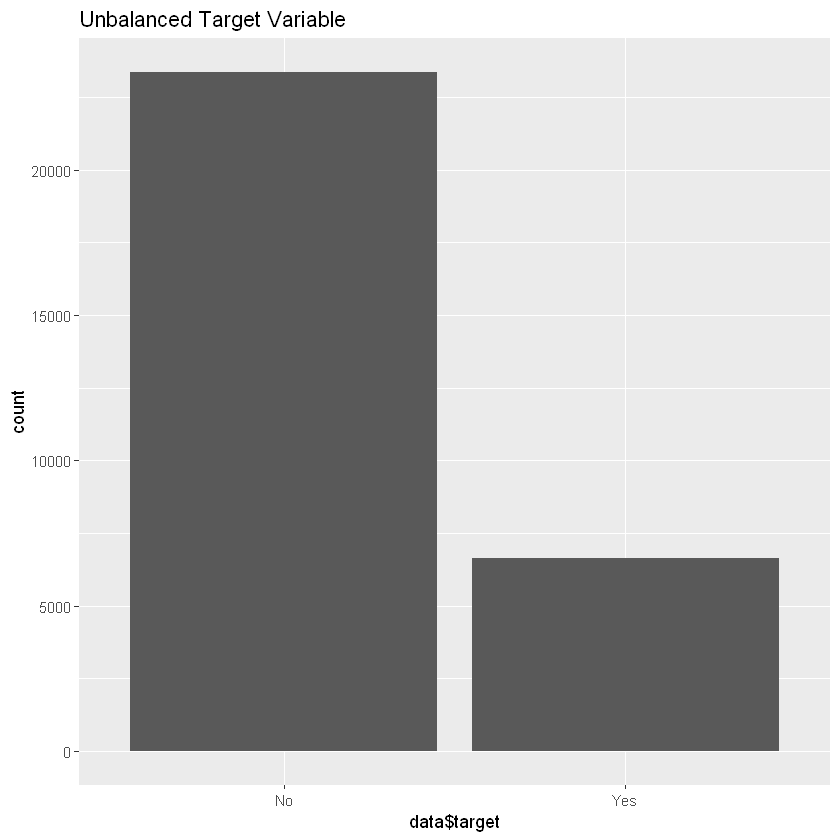

In [39]:
ggplot(data) + geom_bar(aes(data$target)) + ggtitle("Unbalanced Target Variable")

# With 30000 observations, this data is highly unbalanced, with only 6636 observations where the creditor defaulted.  For this reason, the data is balanced before being using in later calculations

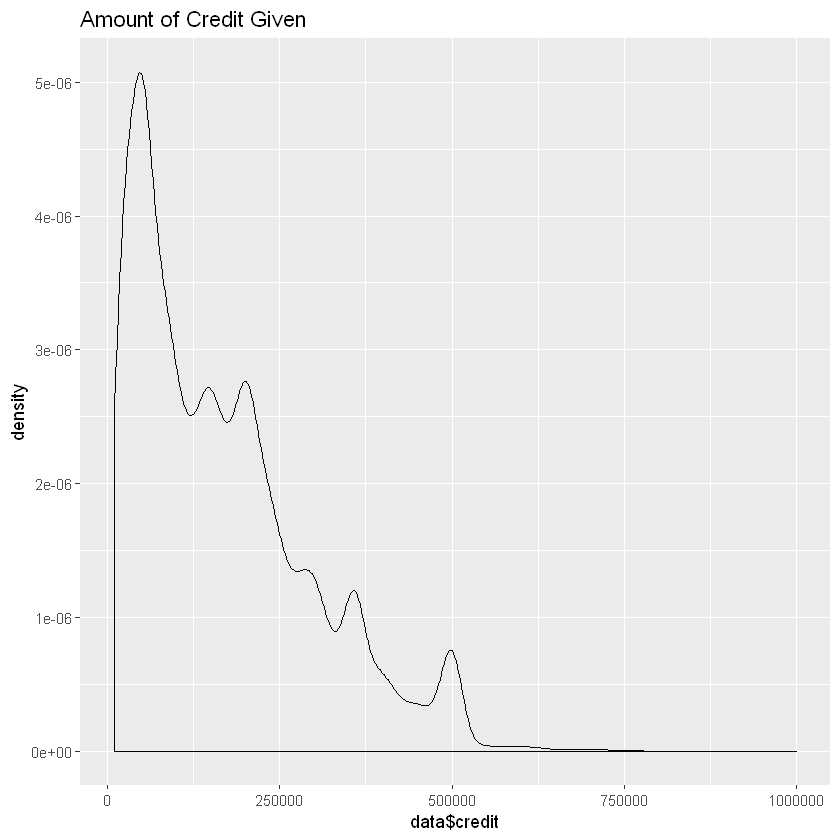

In [40]:
ggplot(data) + geom_density(aes(data$credit)) + ggtitle("Amount of Credit Given")

# This graph shows the amount of credit each creditor receives.  It is highly skewed to the the left, unsurprisingly, with a mean of $167,484.30 and a standard deviation of 128,747.7.

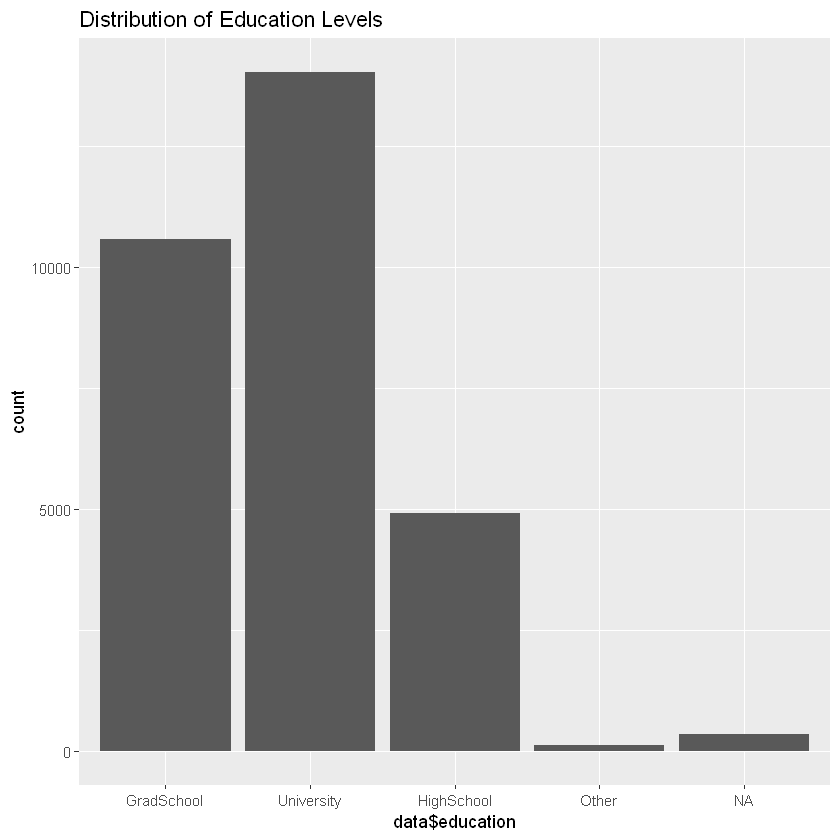

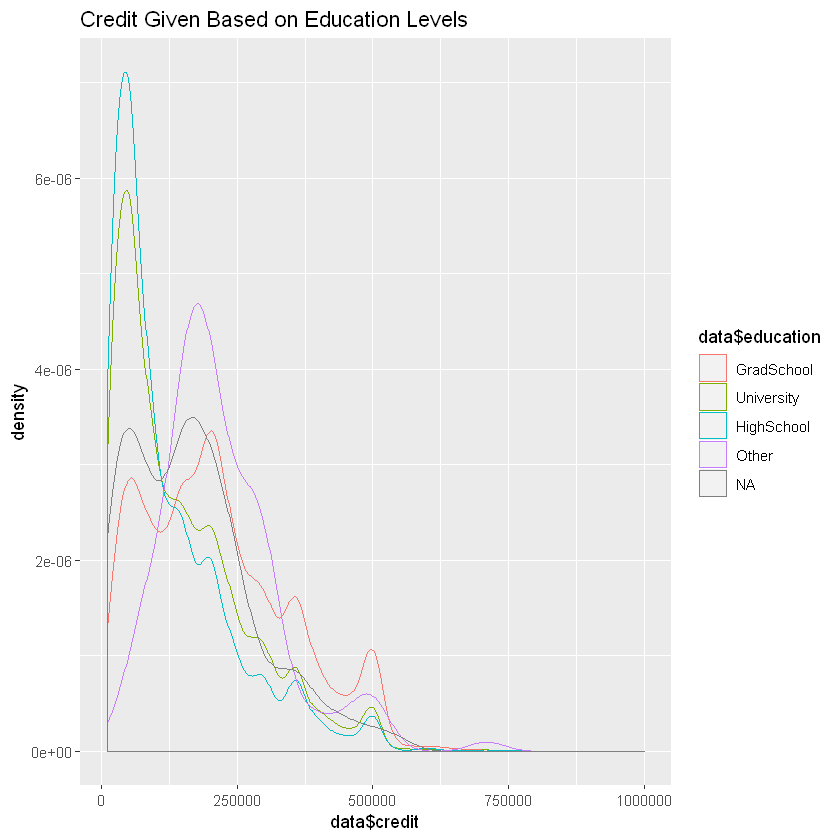

In [42]:
ggplot(data) + geom_bar(aes(data$education)) + ggtitle("Distribution of Education Levels")
ggplot(data) + geom_density(aes(data$credit, color = data$education)) + ggtitle("Credit Given Based on Education Levels")

# The majority of creditors have a university education, unsurprisingly.  Those with a grad school education are able to earn more credit than someone with a lower education level, based on the density of those with a grad school education being less left skewed than those with the high school or university education. Those with a high school education could earn slightly less credit than those with a university education.

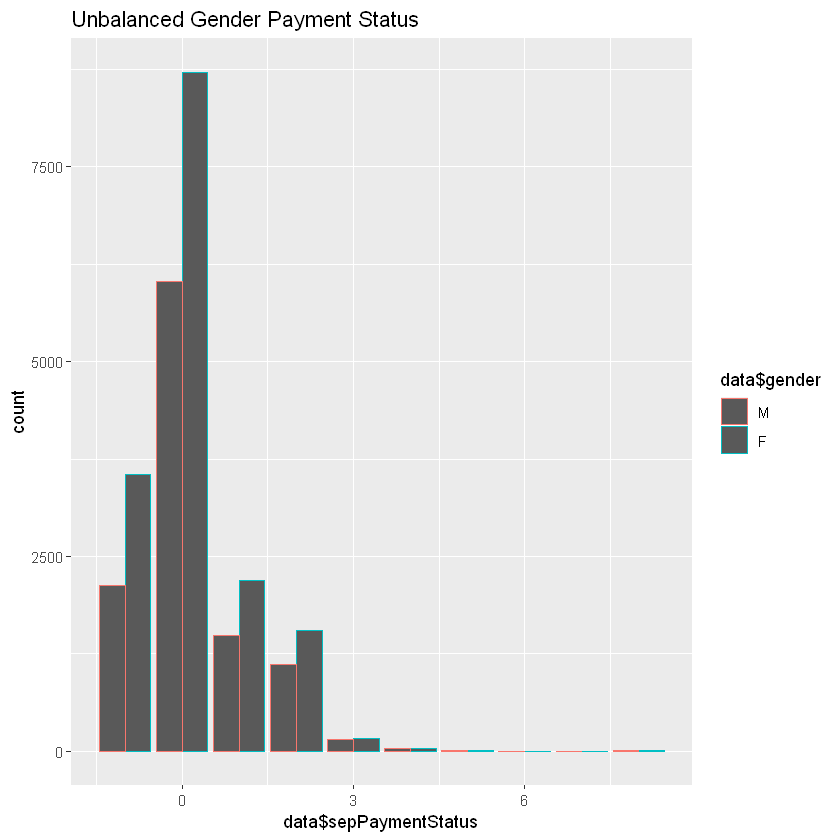

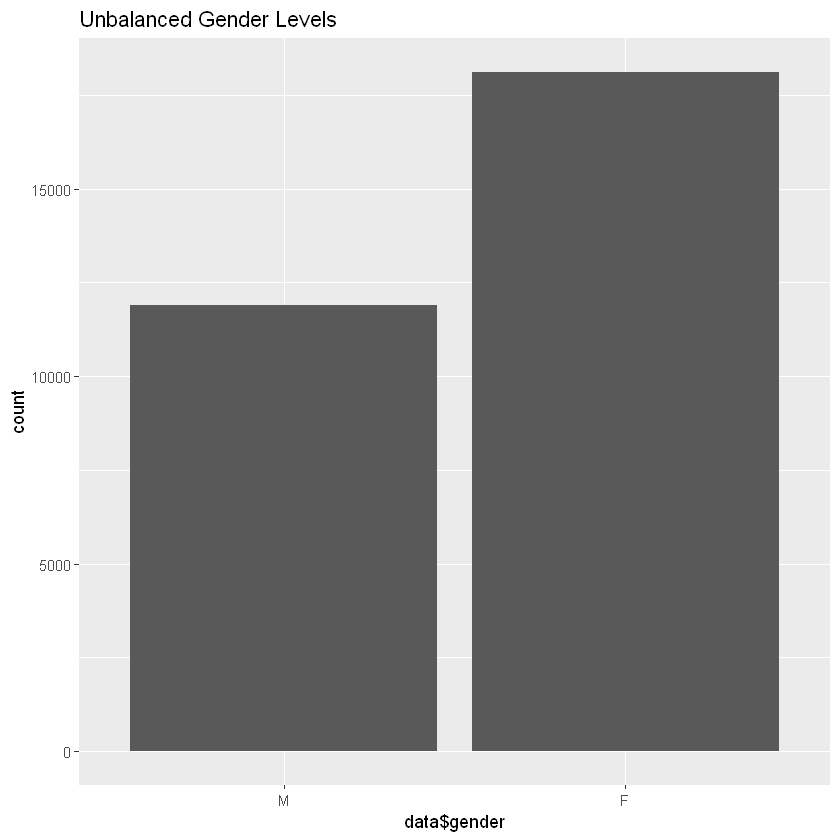

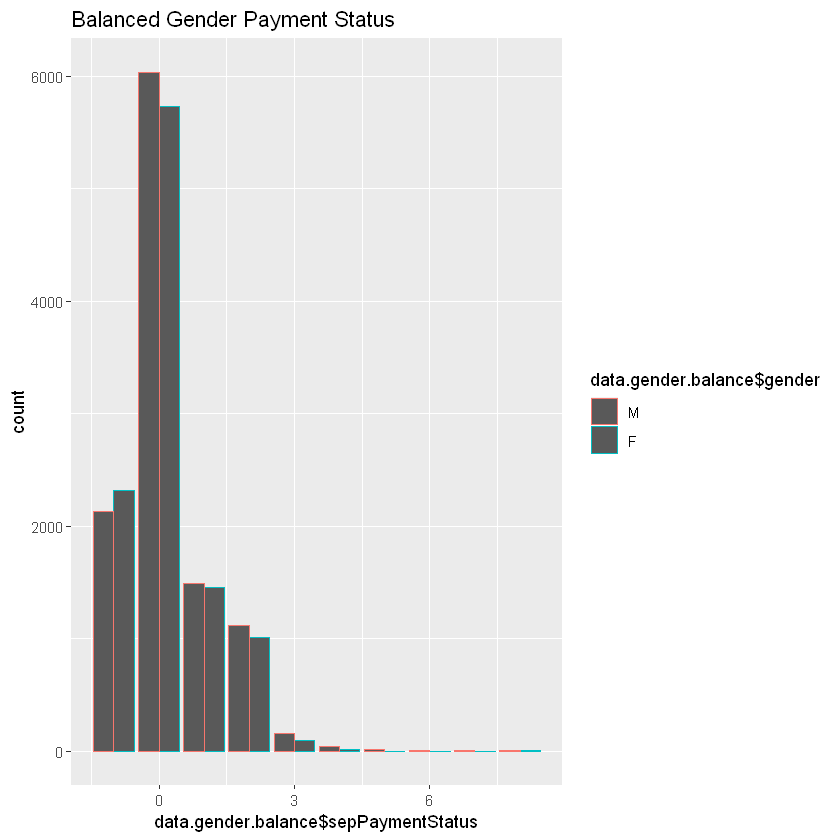

In [43]:
ggplot(data) + geom_bar(aes(data$sepPaymentStatus, color = data$gender), position = "dodge", na.rm = TRUE) + ggtitle("Unbalanced Gender Payment Status")
ggplot(data) + geom_bar(aes(data$gender)) + ggtitle("Unbalanced Gender Levels")

data.male = data[data$gender == "M",]
data.female = data[data$gender == "F",]
data.female.under = data.female[sample(1:nrow(data.female), nrow(data.male)),]
data.gender.balance = rbind(data.male, data.female.under)

ggplot(data.gender.balance) + geom_bar(aes(data.gender.balance$sepPaymentStatus, color = data.gender.balance$gender), position = "dodge", na.rm = TRUE) + ggtitle("Balanced Gender Payment Status")

# Values of -1 indicate on time payments. Values of 0 indicate late for one month. Values greater than 0 indicate payments are late for more than one month. The first graph makes it seem as though females are more likely to be late. However the second graph shows that their are more females.  Therefore, under sampling the female population shows that males are slightly less likely to pay on time.

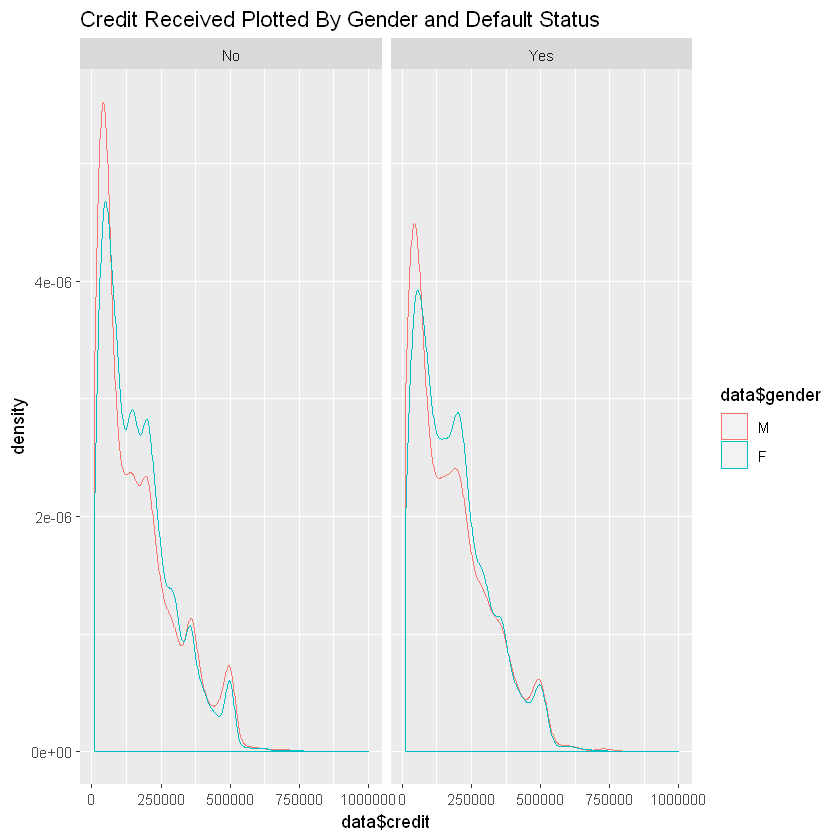

In [44]:
ggplot(data) + geom_density(aes(data$credit, color = data$gender)) + facet_wrap(~target) + ggtitle("Credit Received Plotted By Gender and Default Status")

# Slightly more in depth on gender, males are slightly more likely to borrow less money, regardless of their likelihood of defaulting

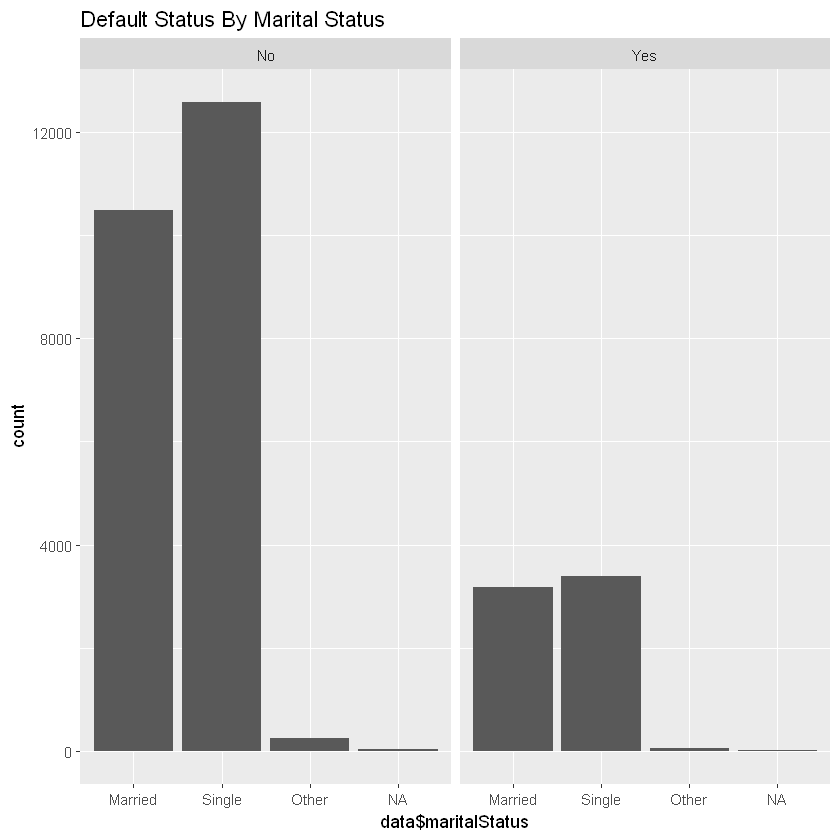

In [45]:
ggplot(data) + geom_bar(aes(data$maritalStatus)) + facet_wrap(~target) + ggtitle("Default Status By Marital Status")

# Proportionally, people who are single appear less likely to default than people who are married

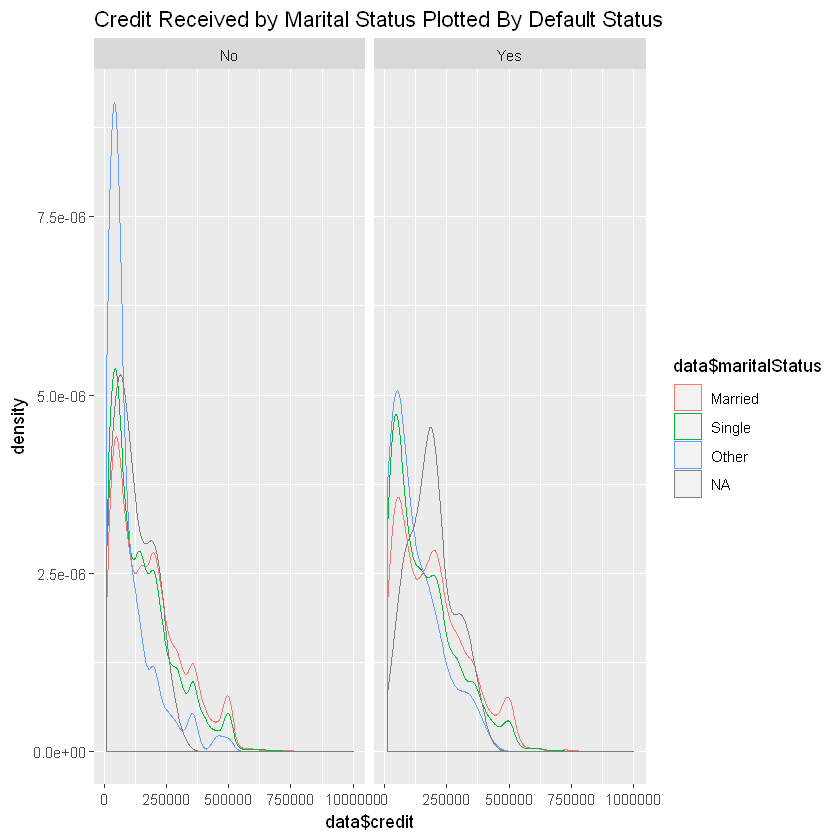

In [46]:
ggplot(data) + geom_density(aes(data$credit, color = data$maritalStatus)) + facet_wrap(~target) + ggtitle("Credit Received by Marital Status Plotted By Default Status")

# Single creditors are more likely to get a little credit than married creditors. This does make some sense, as married couples are more likely to need credit for larger expenses (eg. buying a house). Married and single creditors who do default both likely default because of taking more credit than needed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


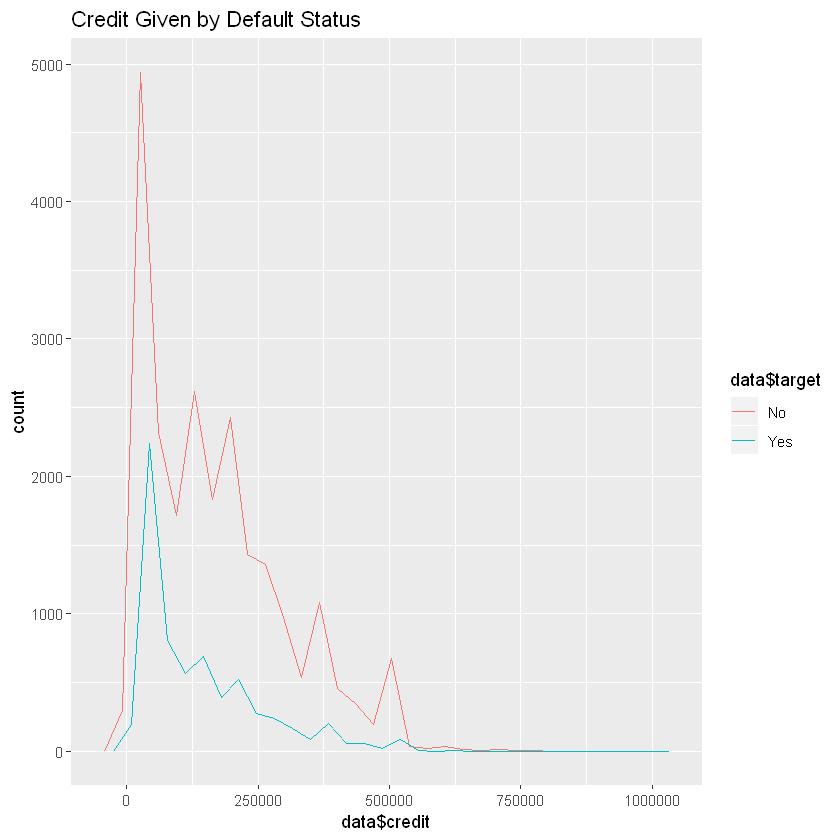

In [47]:
ggplot(data) + geom_freqpoly(aes(data$credit, color = data$target), position = "dodge") + ggtitle("Credit Given by Default Status")

# Unsurprisingly, creditors who are unlikely to default can take out more credit than those who are likely to default

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


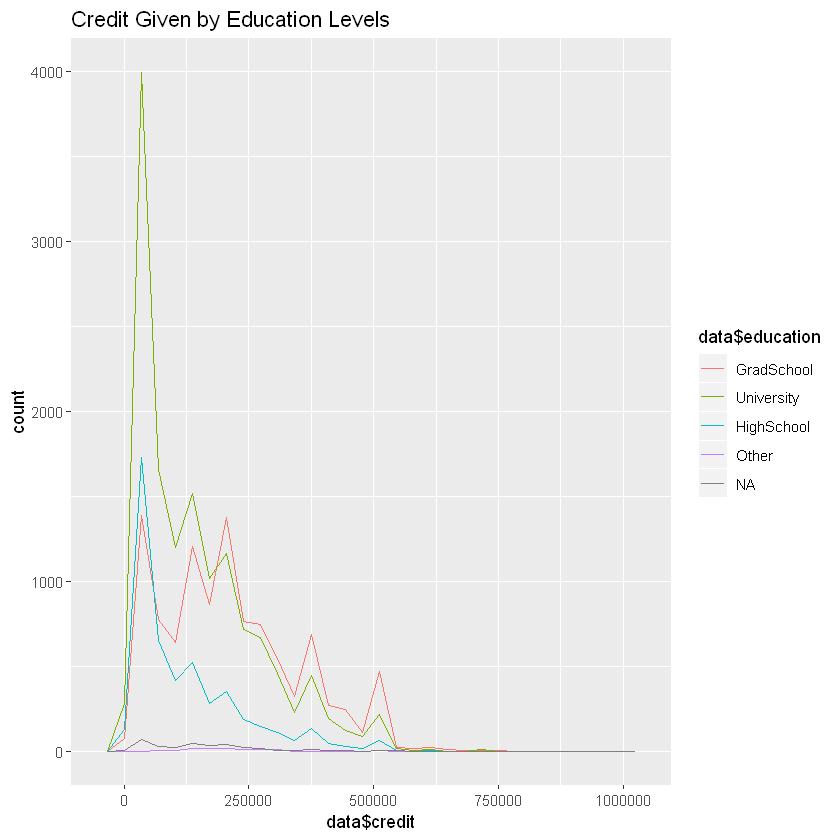

In [48]:
ggplot(data) + geom_freqpoly(aes(data$credit, color = data$education)) + ggtitle("Credit Given by Education Levels")

# Another look at credit by education level, those with a grad school education can take out more credit than those with less education.

Warning message:
"Removed 2759 rows containing non-finite values (stat_count)."

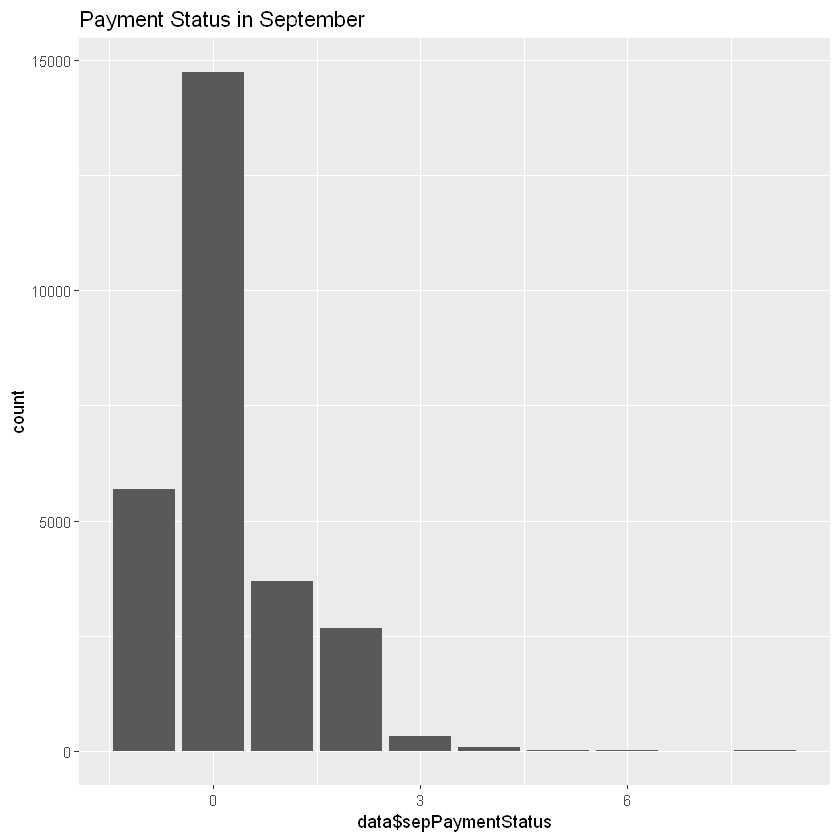

In [49]:
ggplot(data) + geom_bar(aes(data$sepPaymentStatus)) + ggtitle("Payment Status in September")

# This plot is similar to the plot for other months.Most creditors pay on time, and are fairly unlikely to hold off on paying off their debt

Warning message:
"Removed 590 rows containing non-finite values (stat_density)."

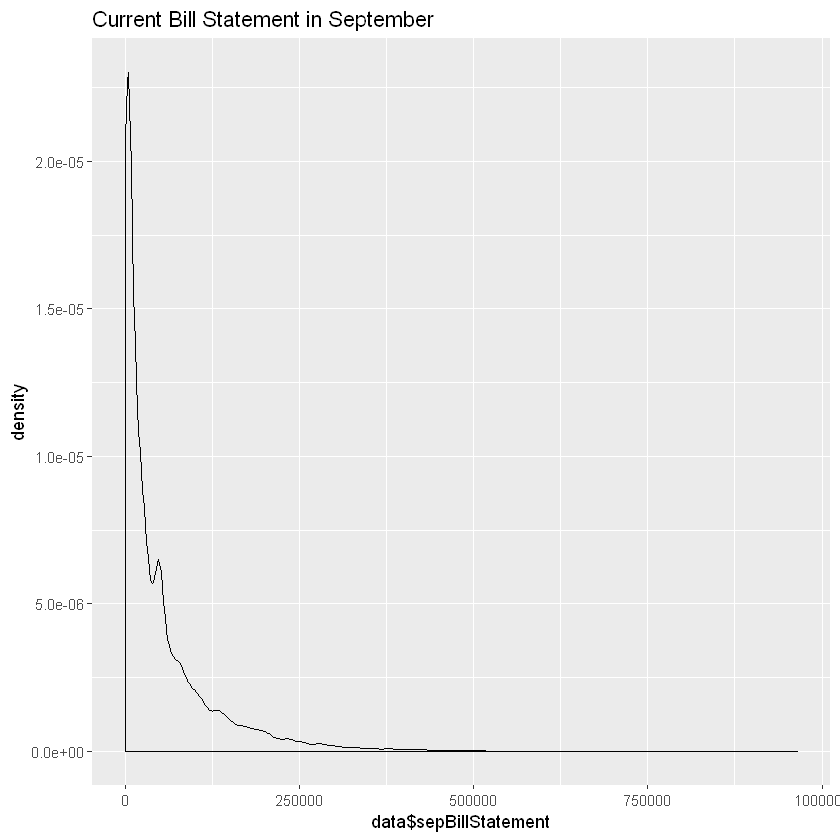

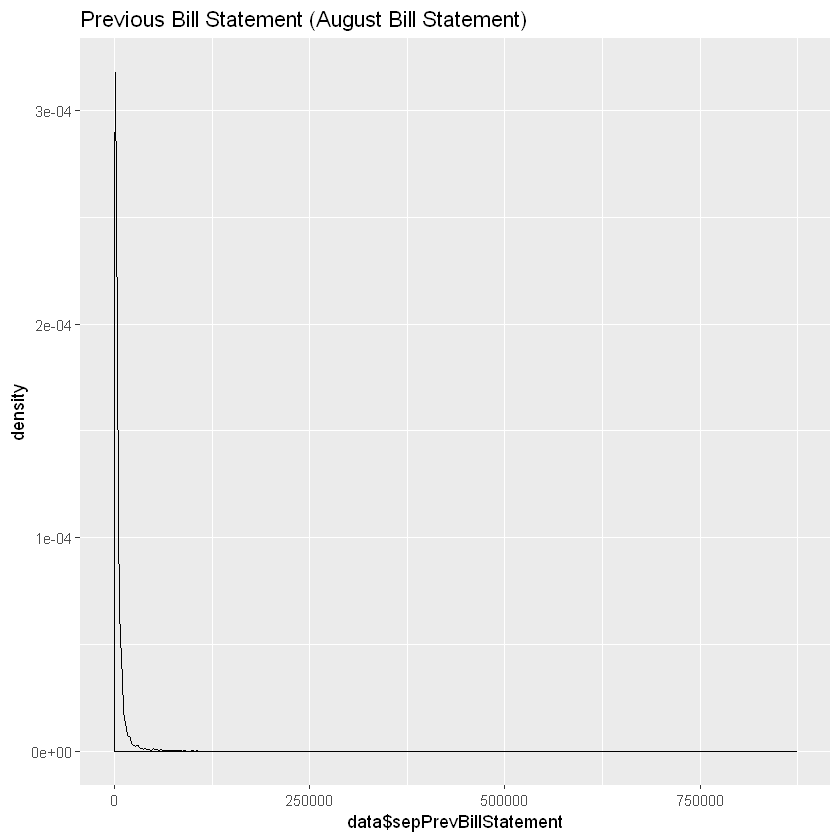

In [50]:
ggplot(data) + geom_density(aes(data$sepBillStatement)) + ggtitle("Current Bill Statement in September")
ggplot(data) + geom_density(aes(data$sepPrevBillStatement)) + ggtitle("Previous Bill Statement (August Bill Statement)")

# These two graphs show the likelihood of a creditor to pay off their debts. This is in part the reason why these models were so difficult to build, as creditors are unlikely to default

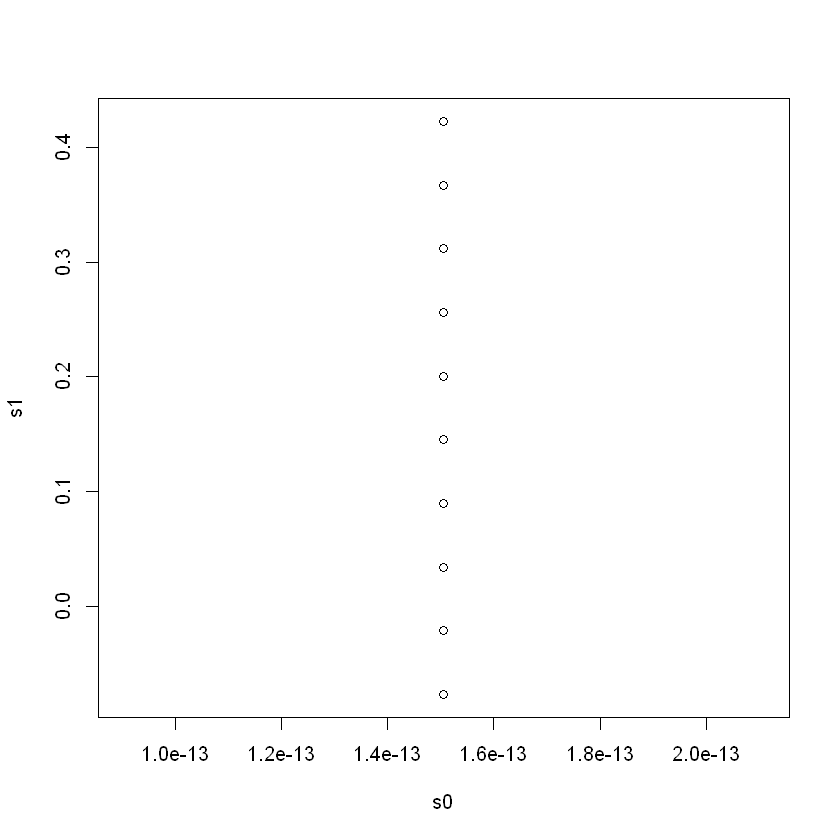

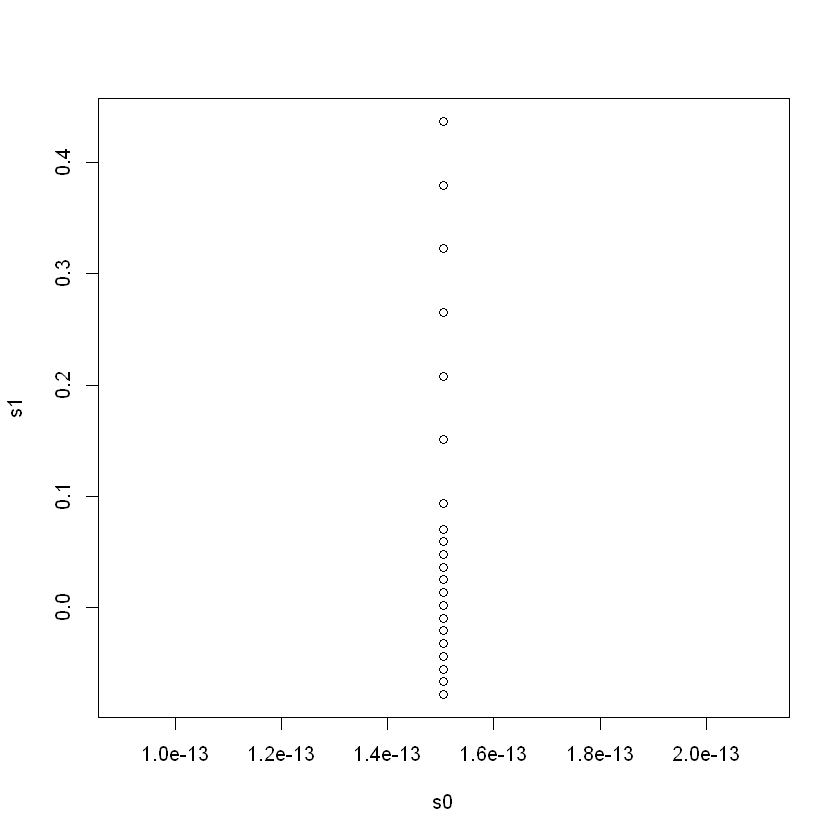

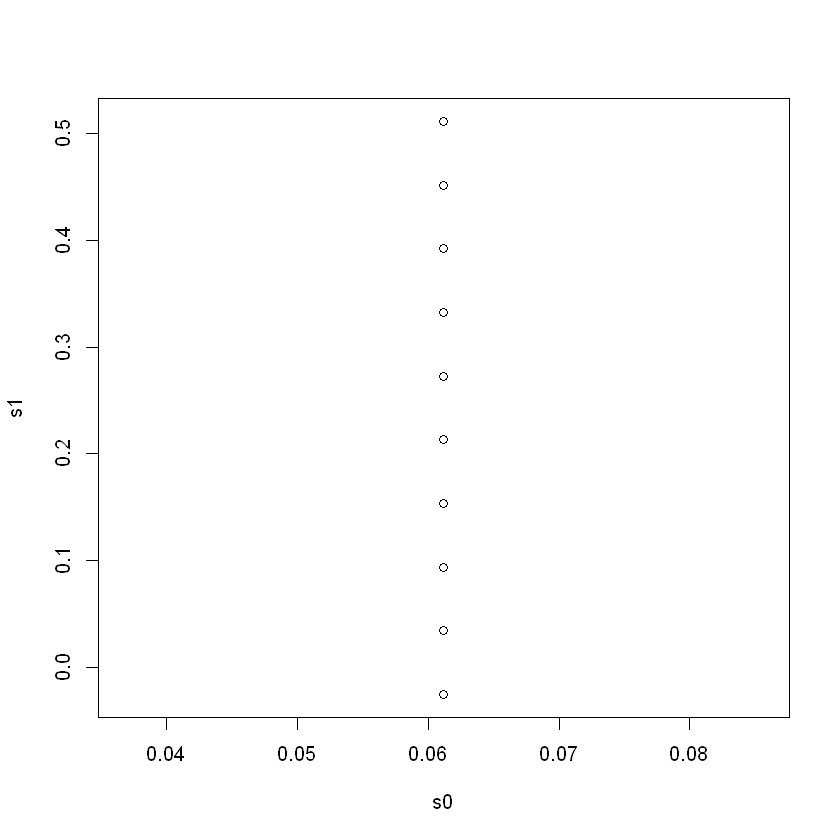

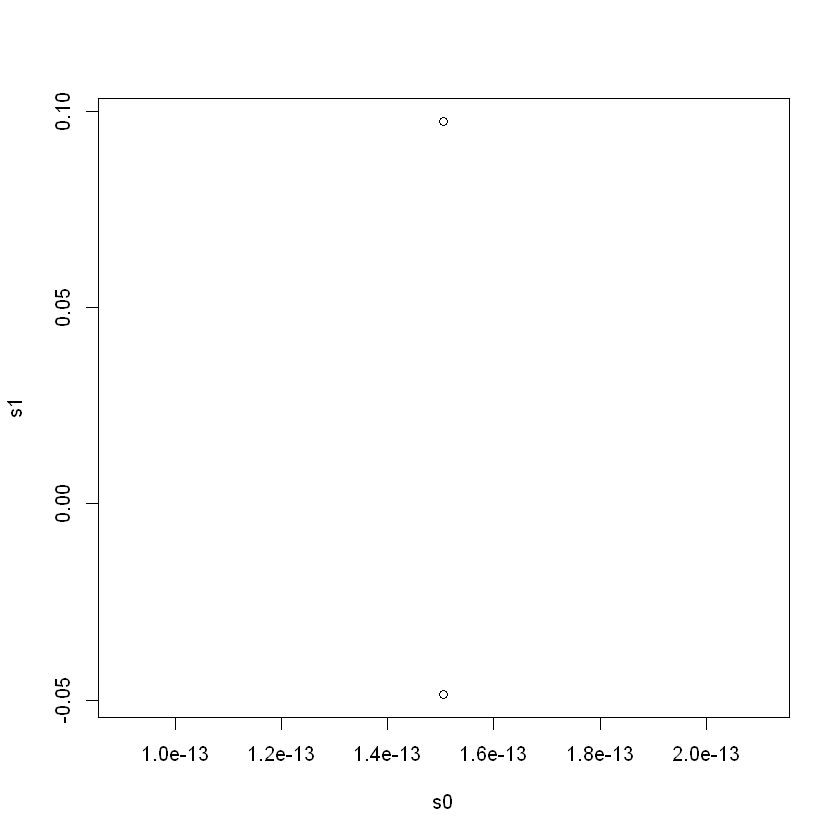

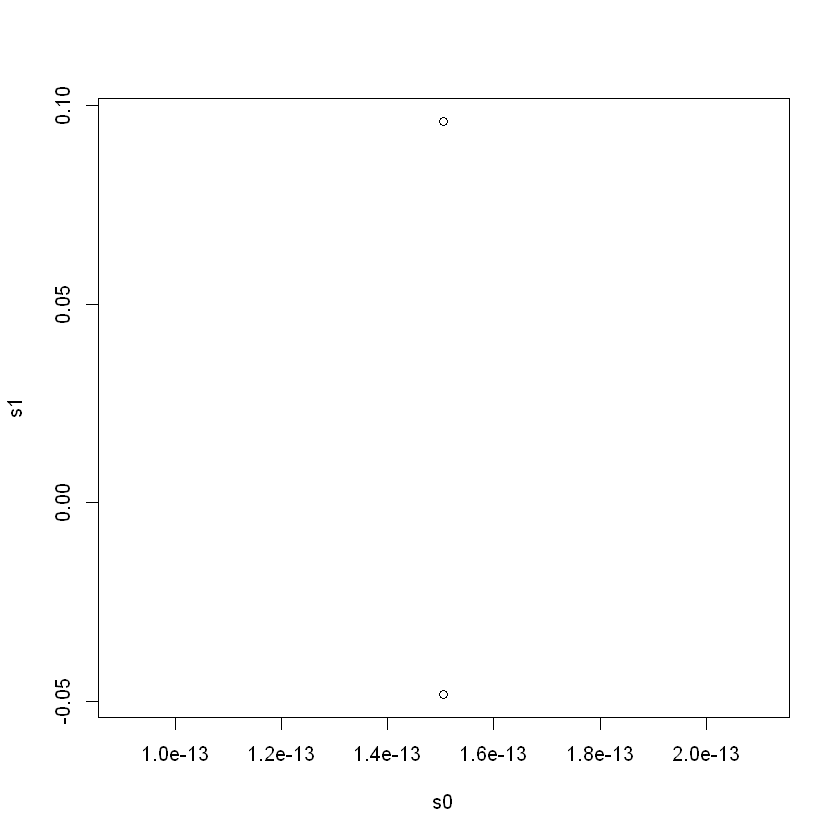

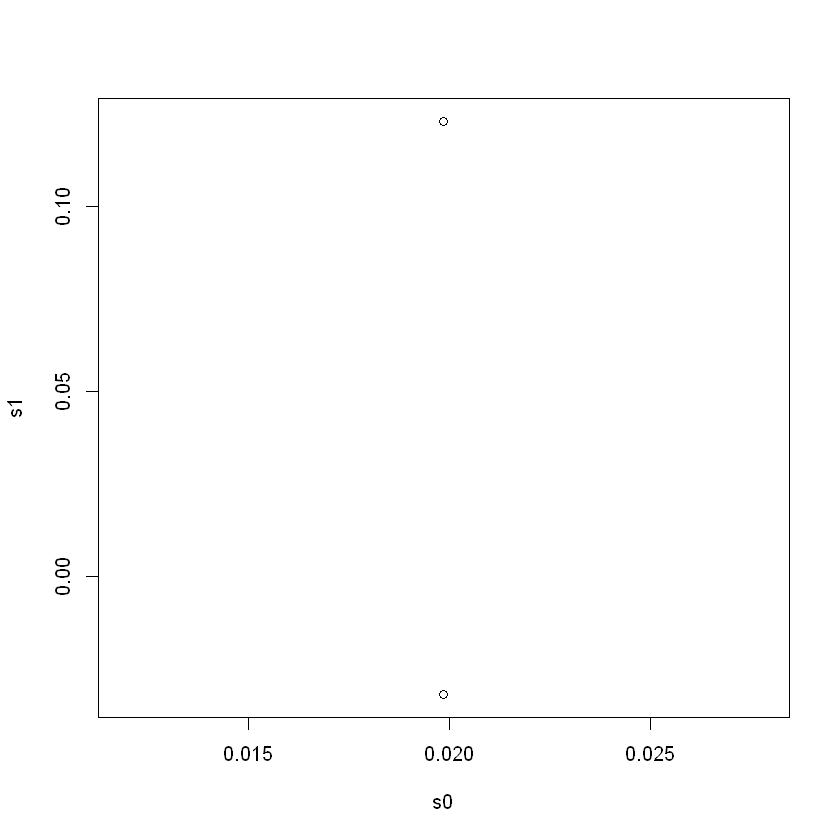

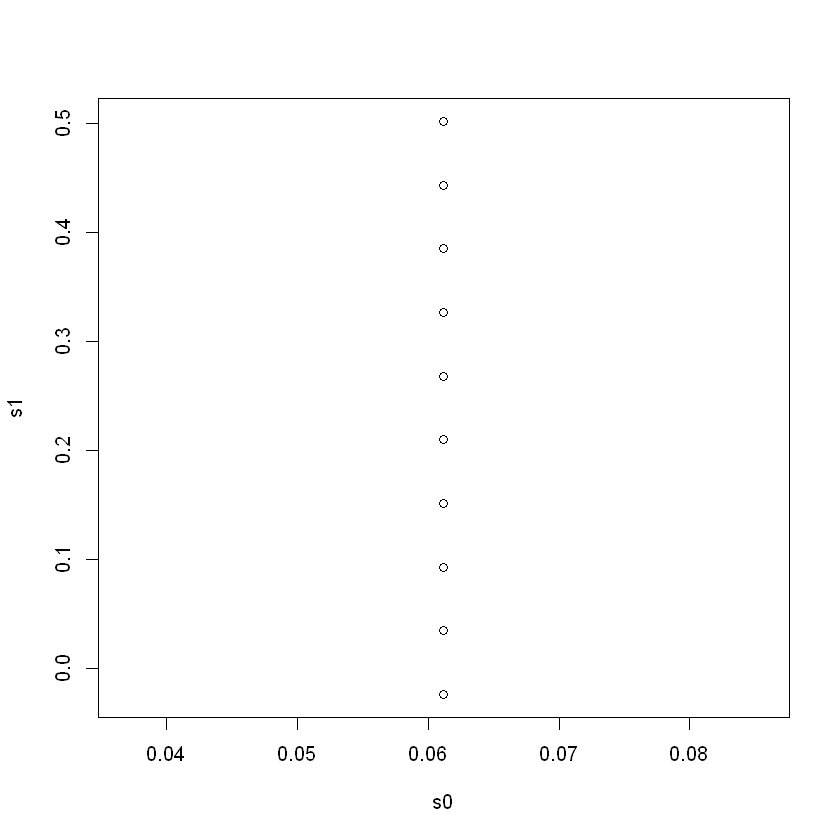

In [30]:
# Basic analysis of results
# GlMNET
  plot(fit.median.predict)
  
  plot(fit.knn.predict)
  
  plot(fit.complete.predict)

  plot(fit.bin.median.predict)
  
  plot(bin.fit.knn.predict)
  
  plot(bin.fit.complete.predict)
  
  plot(fit.dummy.predict)
#knn impute had the most amount of data, leading me to believe that it is the most useful of the glmnets

In [31]:
median.cm
  
knn.cm
  
complete.cm
  
bin.median.cm
  
bin.knn.cm
  
bin.complete.cm
  
dummy.cm

# Interestingly, using dummy encoding for the rpart trees had the best accuracy at 70.95% correct classification rate, with the median impute following binning having the best sensitivity at 56.88%

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1713  943
       Yes  277 1047
                                          
               Accuracy : 0.6935          
                 95% CI : (0.6789, 0.7078)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3869          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5261          
            Specificity : 0.8608          
         Pos Pred Value : 0.7908          
         Neg Pred Value : 0.6450          
             Prevalence : 0.5000          
         Detection Rate : 0.2631          
   Detection Prevalence : 0.3327          
      Balanced Accuracy : 0.6935          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1682  976
       Yes  308 1014
                                          
               Accuracy : 0.6774          
                 95% CI : (0.6626, 0.6919)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3548          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5095          
            Specificity : 0.8452          
         Pos Pred Value : 0.7670          
         Neg Pred Value : 0.6328          
             Prevalence : 0.5000          
         Detection Rate : 0.2548          
   Detection Prevalence : 0.3322          
      Balanced Accuracy : 0.6774          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1307  746
       Yes  179  835
                                          
               Accuracy : 0.6984          
                 95% CI : (0.6818, 0.7146)
    No Information Rate : 0.5155          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4031          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5281          
            Specificity : 0.8795          
         Pos Pred Value : 0.8235          
         Neg Pred Value : 0.6366          
             Prevalence : 0.5155          
         Detection Rate : 0.2723          
   Detection Prevalence : 0.3306          
      Balanced Accuracy : 0.7038          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1632  858
       Yes  358 1132
                                          
               Accuracy : 0.6945          
                 95% CI : (0.6799, 0.7088)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3889          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5688          
            Specificity : 0.8201          
         Pos Pred Value : 0.7597          
         Neg Pred Value : 0.6554          
             Prevalence : 0.5000          
         Detection Rate : 0.2844          
   Detection Prevalence : 0.3744          
      Balanced Accuracy : 0.6945          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1651  863
       Yes  339 1127
                                          
               Accuracy : 0.698           
                 95% CI : (0.6835, 0.7122)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.396           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5663          
            Specificity : 0.8296          
         Pos Pred Value : 0.7688          
         Neg Pred Value : 0.6567          
             Prevalence : 0.5000          
         Detection Rate : 0.2832          
   Detection Prevalence : 0.3683          
      Balanced Accuracy : 0.6980          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1594  922
       Yes  263  973
                                        
               Accuracy : 0.6842        
                 95% CI : (0.669, 0.699)
    No Information Rate : 0.5051        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.3705        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.5135        
            Specificity : 0.8584        
         Pos Pred Value : 0.7872        
         Neg Pred Value : 0.6335        
             Prevalence : 0.5051        
         Detection Rate : 0.2593        
   Detection Prevalence : 0.3294        
      Balanced Accuracy : 0.6859        
                                        
       'Positive' Class : Yes           
                                        

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1324  729
       Yes  162  852
                                          
               Accuracy : 0.7095          
                 95% CI : (0.6931, 0.7255)
    No Information Rate : 0.5155          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.425           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5389          
            Specificity : 0.8910          
         Pos Pred Value : 0.8402          
         Neg Pred Value : 0.6449          
             Prevalence : 0.5155          
         Detection Rate : 0.2778          
   Detection Prevalence : 0.3306          
      Balanced Accuracy : 0.7149          
                                          
       'Positive' Class : Yes             
                                          


Call:
C5.0.default(x = median.train[0.1:(ncol(median.train) - 1)], y
 = median.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:52:37 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0:
:...sepPaymentStatus > 1: Yes (1733/212)
:   sepPaymentStatus <= 1:
:   :...mayPaymentStatus > 0: Yes (299/58)
:       mayPaymentStatus <= 0:
:       :...junPaymentStatus <= -1: No (205/82)
:           junPaymentStatus > -1:
:           :...junPaymentStatus > 1: Yes (106/26)
:               junPaymentStatus <= 1:
:               :...aprPaymentStatus <= -1:
:                   :...julPaymentStatus <= -1: Yes (29/9)
:                   :   julPaymentStatus > -1: No (72/31)
:                   aprPaymentStatus > -1:
:                   :...augPaymentStatus > -1: Yes (603/216)
:                       augPaymentStatus <= -1:
:                       :...sepBillStatement <= 4221:


Call:
C5.0.default(x = knn.train[0.1:(ncol(knn.train) - 1)], y = knn.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:54:00 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0.3307757:
:...sepPaymentStatus > 1.213436: Yes (1710/186)
:   sepPaymentStatus <= 1.213436:
:   :...junPaymentStatus <= -1.098185:
:       :...julPaymentStatus <= -0.4426645: No (204/78)
:       :   julPaymentStatus > -0.4426645: Yes (46/16)
:       junPaymentStatus > -1.098185:
:       :...julPaymentStatus > 0.5848945: Yes (505/122)
:           julPaymentStatus <= 0.5848945:
:           :...sepPrevBillStatement <= -0.1662367: Yes (633/227)
:               sepPrevBillStatement > -0.1662367: No (49/17)
sepPaymentStatus <= 0.3307757:
:...augPaymentStatus > 0.8799068: Yes (178/55)
    augPaymentStatus <= 0.8799068:
    :...junPaymentStatus > 0.8201472: Yes (413/171)
        junPaymentSta

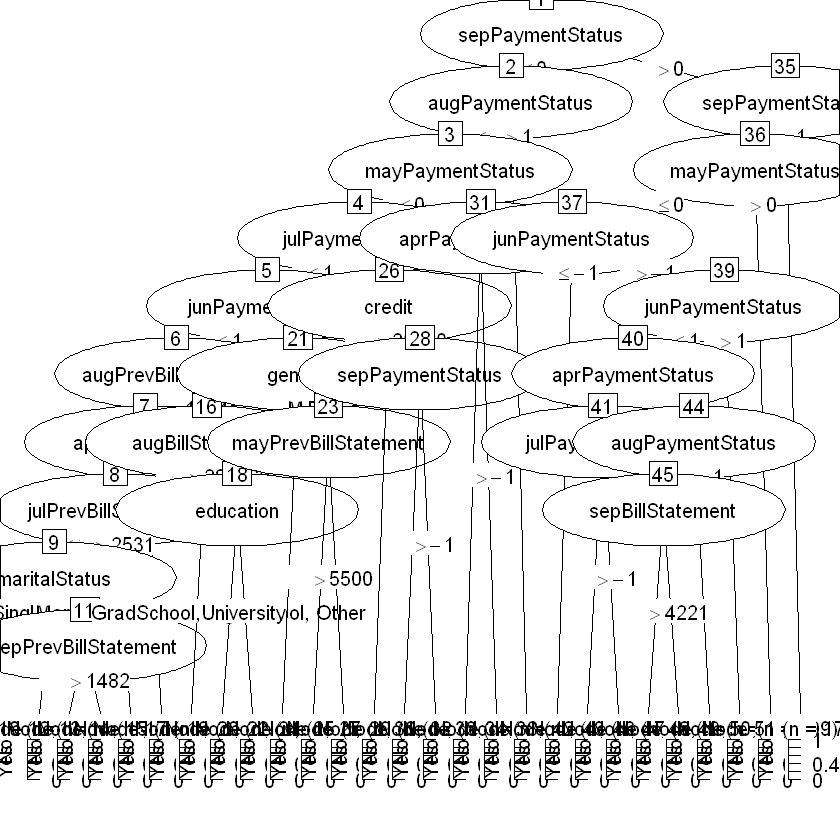


Call:
C5.0.default(x = complete.train[0.1:(ncol(complete.train) - 1)], y
 = complete.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:55:40 2018
-------------------------------

Class specified by attribute `outcome'

Read 7159 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0:
:...augPaymentStatus > -1: Yes (2311/371)
:   augPaymentStatus <= -1:
:   :...sepPaymentStatus > 1: Yes (45/12)
:       sepPaymentStatus <= 1:
:       :...junPaymentStatus <= 1: No (68/23)
:           junPaymentStatus > 1: Yes (9)
sepPaymentStatus <= 0:
:...augPaymentStatus > 1: Yes (137/43)
    augPaymentStatus <= 1:
    :...junPaymentStatus > 1:
        :...credit <= 220000: Yes (318/115)
        :   credit > 220000: No (35/12)
        junPaymentStatus <= 1:
        :...aprPaymentStatus > 0:
            :...credit <= 20000: Yes (26/5)
            :   credit > 20000: No (194/84)
            aprPaymentStatus <= 0:
            :...junBillStatement > 817: No (3678/1091

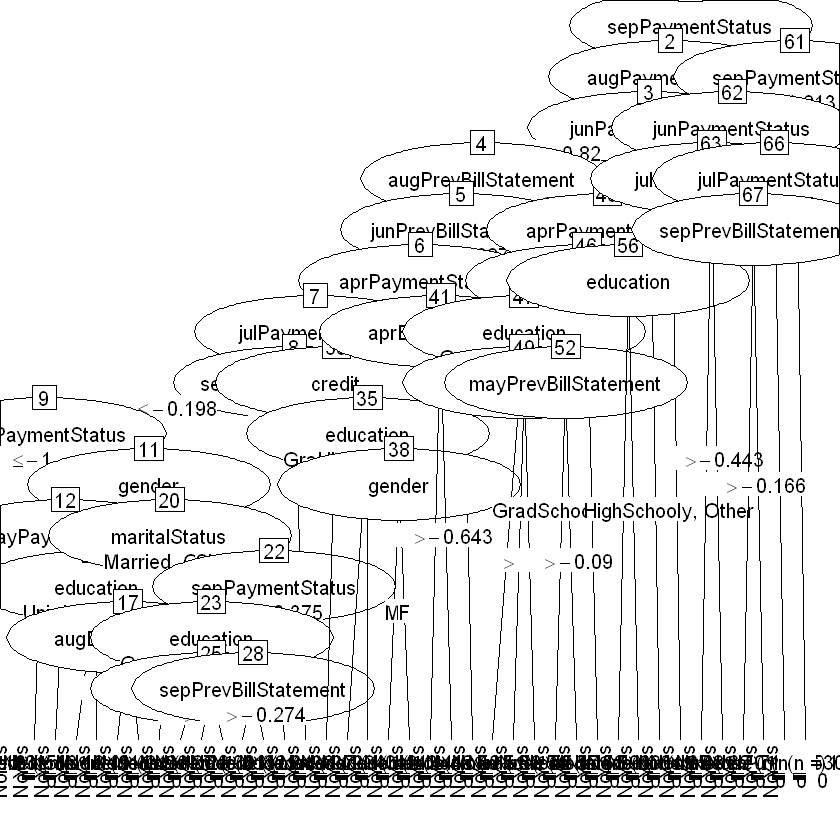


Call:
C5.0.default(x = bin.median.train[0.1:(ncol(bin.median.train) - 1)], y
 = bin.median.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:56:56 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0:
:...sepBillStatement <= 538:
:   :...junPaymentStatus > 0: Yes (33/7)
:   :   junPaymentStatus <= 0:
:   :   :...junPrevBillStatement <= 178:
:   :       :...gender = M:
:   :       :   :...augPrevBillStatement <= 97: Yes (110/27)
:   :       :   :   augPrevBillStatement > 97: No (11/4)
:   :       :   gender = F:
:   :       :   :...education = Other: Yes (0)
:   :       :       education in {University,HighSchool}:
:   :       :       :...augBillStatement <= 4675: Yes (104/26)
:   :       :       :   augBillStatement > 4675: No (7)
:   :       :       education = GradSchool:
:   :       :       :...maritalStatus = Other: No (2)
:   :       :           marital

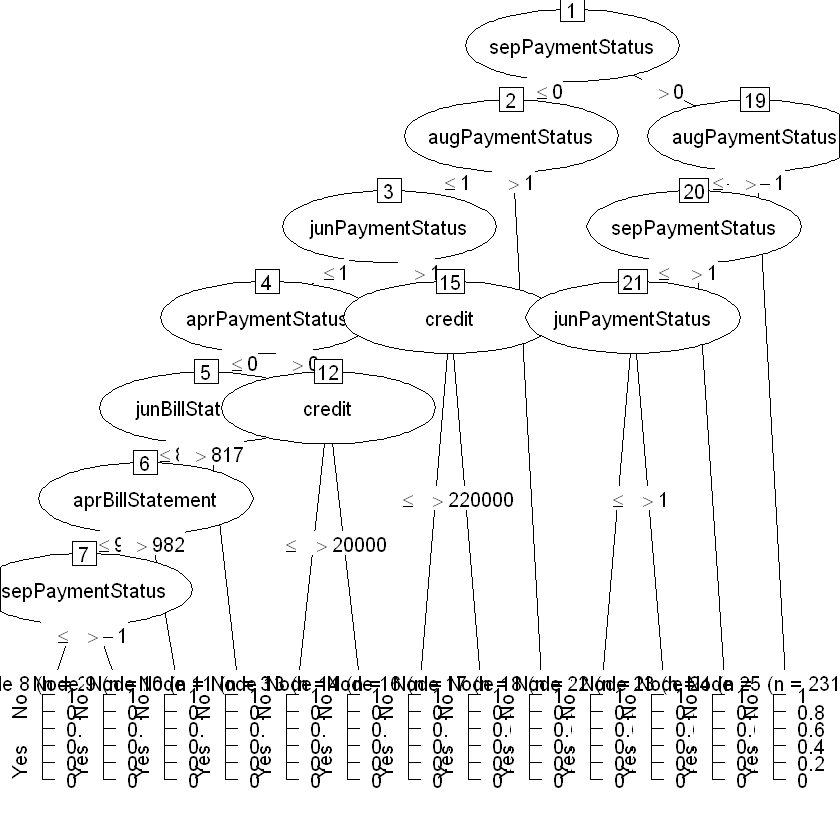


Call:
C5.0.default(x = bin.knn.train[0.1:(ncol(bin.knn.train) - 1)], y
 = bin.knn.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:58:04 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > -0.7061214:
:...sepBillStatement > -0.6793006:
:   :...sepPrevBillStatement <= 0.6321223:
:   :   :...augPaymentStatus > -0.5442408: Yes (1932/354)
:   :   :   augPaymentStatus <= -0.5442408:
:   :   :   :...sepPrevBillStatement > -0.2553307: Yes (516/63)
:   :   :       sepPrevBillStatement <= -0.2553307:
:   :   :       :...age <= -1.118883: Yes (6)
:   :   :           age > -1.118883: No (22/7)
:   :   sepPrevBillStatement > 0.6321223:
:   :   :...mayBillStatement > 0.8063101: Yes (16/1)
:   :       mayBillStatement <= 0.8063101:
:   :       :...maritalStatus in {Single,Other}: No (21/2)
:   :           maritalStatus = Married:
:   :           :...credit <= -0.4310786: 

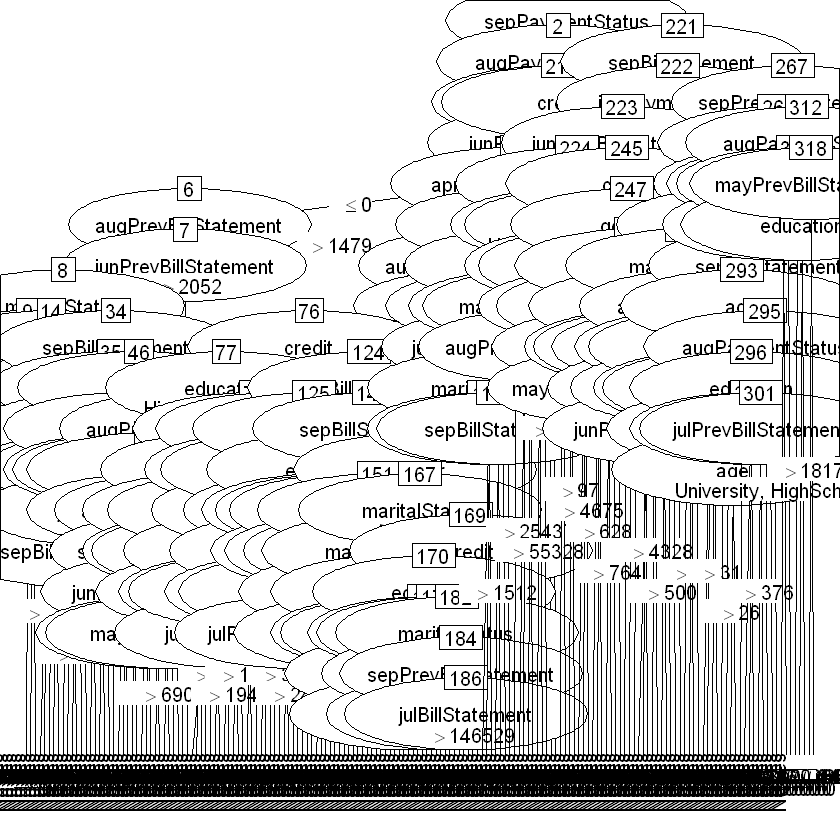


Call:
C5.0.default(x = bin.complete.train[0.1:(ncol(bin.complete.train) - 1)], y
 = bin.complete.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 19:59:11 2018
-------------------------------

Class specified by attribute `outcome'

Read 8759 cases (23 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0:
:...education = Other: No (3)
:   education in {GradSchool,University,HighSchool}:
:   :...sepBillStatement > 577: Yes (2438/408)
:       sepBillStatement <= 577:
:       :...augPrevBillStatement <= 328: Yes (364/123)
:           augPrevBillStatement > 328:
:           :...education = University:
:               :...aprBillStatement <= 873: Yes (24/11)
:               :   aprBillStatement > 873: No (14/1)
:               education = GradSchool:
:               :...credit > 330000: No (15/2)
:               :   credit <= 330000:
:               :   :...junPrevBillStatement <= 7700: No (48/22)
:               :       junPrevBillStatement > 7700: Yes (6)
:  

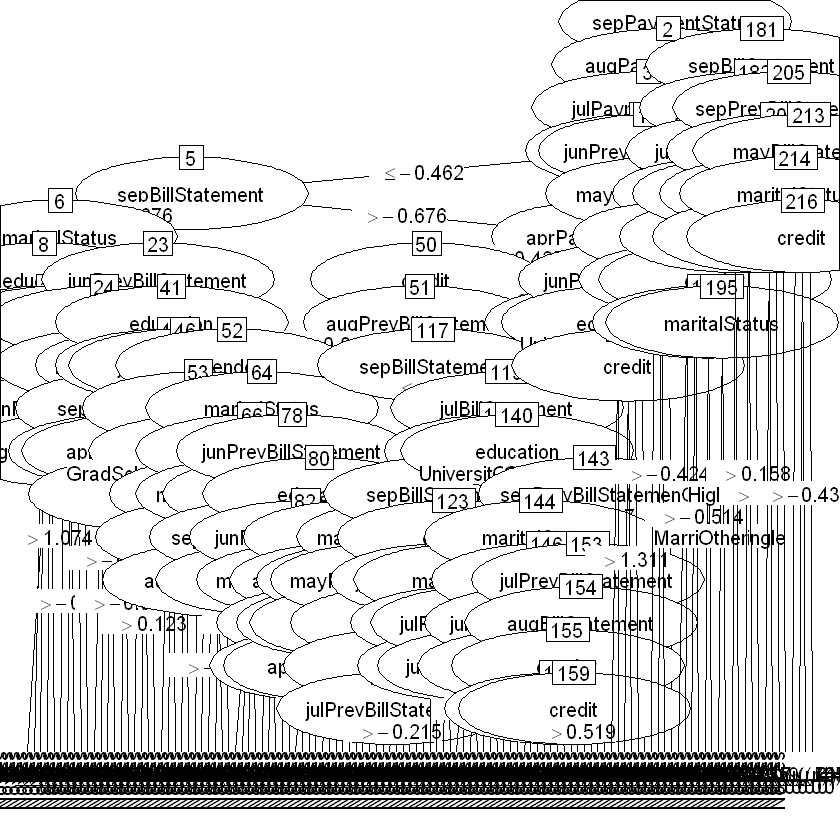


Call:
C5.0.default(x = dummy.train[0.1:(ncol(dummy.train) - 1)], y
 = dummy.train$target)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:00:16 2018
-------------------------------

Class specified by attribute `outcome'

Read 7159 cases (29 attributes) from undefined.data

Decision tree:

sepPaymentStatus > 0:
:...junPaymentStatus > -1: Yes (2311/387)
:   junPaymentStatus <= -1:
:   :...augPrevBillStatement <= 3071: Yes (101/39)
:       augPrevBillStatement > 3071: No (21/2)
sepPaymentStatus <= 0:
:...julPaymentStatus > 1: Yes (420/154)
    julPaymentStatus <= 1:
    :...augPaymentStatus > 1: Yes (72/22)
        augPaymentStatus <= 1:
        :...junPaymentStatus > 1: Yes (215/102)
            junPaymentStatus <= 1:
            :...sepBillStatement <= 1319:
                :...mayBillStatement <= 2016: Yes (241/103)
                :   mayBillStatement > 2016: No (112/39)
                sepBillStatement > 1319:
                :...aprPaymentStatus <= 0: No (3504/1016)
            

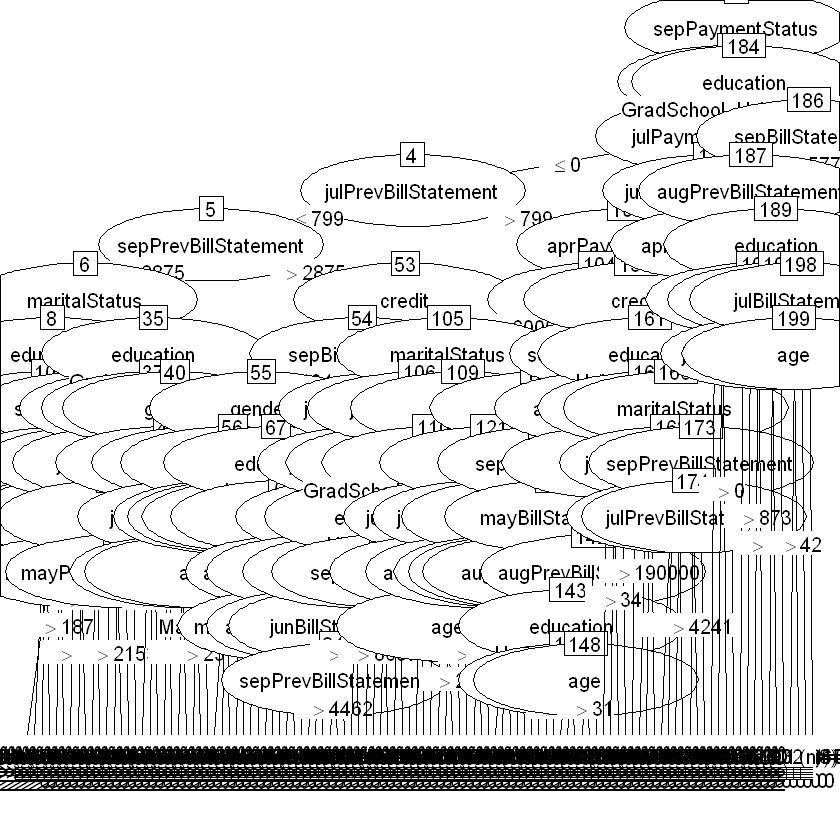

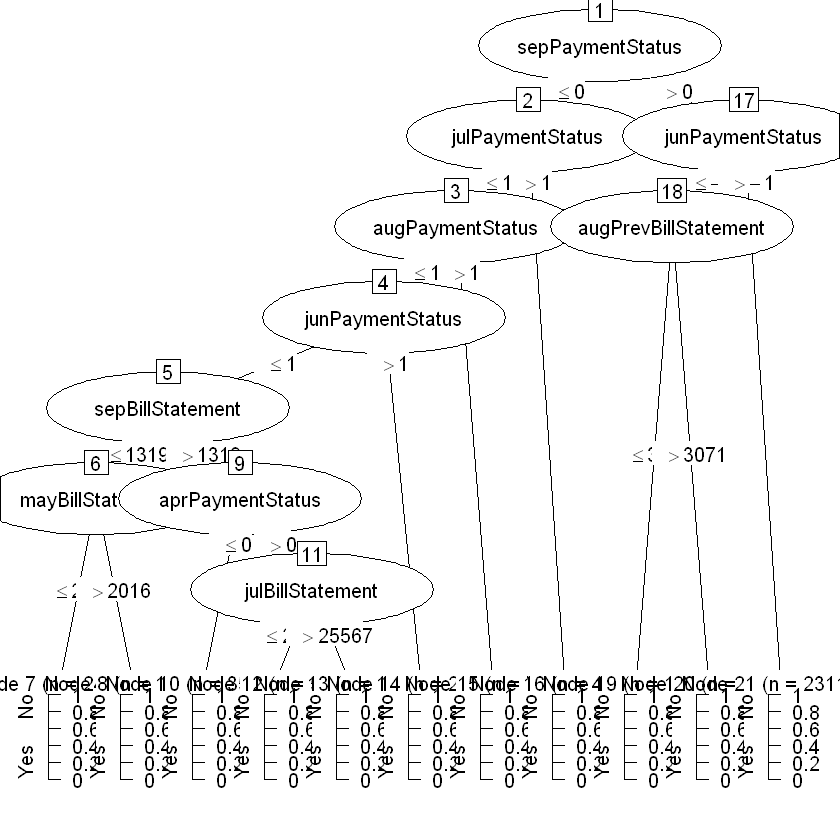

In [32]:
summary(C5.0.tree.median)
plot(C5.0.tree.median)
  
summary(C5.0.tree.knn)
plot(C5.0.tree.knn)
  
summary(C5.0.tree.complete)
plot(C5.0.tree.complete)
  
summary(bin.C5.0.tree.median)
plot(bin.C5.0.tree.median)
  
summary(bin.C5.0.tree.knn)
plot(bin.C5.0.tree.knn)
  
summary(bin.C5.0.tree.complete)
plot(bin.C5.0.tree.complete)
  
summary(C5.0.tree.dummy)
plot(C5.0.tree.dummy)

# Binning variables made the tree grow by a large amount.  However, these trees had much lower error rates.

In [34]:
model7median[[4]][c(2:4,6)]
model7knn[[4]][c(2:4,6)]
model7complete[[4]][c(2:4,6)]
bin.model7median[[4]][c(2:4,6)]
bin.model7knn[[4]][c(2:4,6)]
bin.model7complete[[4]][c(2:4,6)]
model7dummy[[4]][c(2:4,6)]

# Interestingly, increasing having a higher node within a dataset requirement increased accuracy. The best model was the tree with no binning or imputing.

splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7069542,0.009232669
gini,2,0.7068463,0.009020389
gini,3,0.7086759,0.009709290


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7082460,0.008448072
gini,2,0.7079224,0.006904915
gini,3,0.7083528,0.007766544


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7263572,0.009474972
gini,2,0.7264963,0.010757681
gini,3,0.7250995,0.009223967


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7083488,0.01353374
gini,2,0.7085643,0.01533019
gini,3,0.7078114,0.01201814


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7057690,0.01654236
gini,2,0.7075999,0.01809142
gini,3,0.7079230,0.02164219


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7083002,0.012404918
gini,2,0.7090997,0.009976551
gini,3,0.7095555,0.011181813


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7211926,0.008285868
gini,2,0.7197947,0.008576153
gini,3,0.7223097,0.010170602


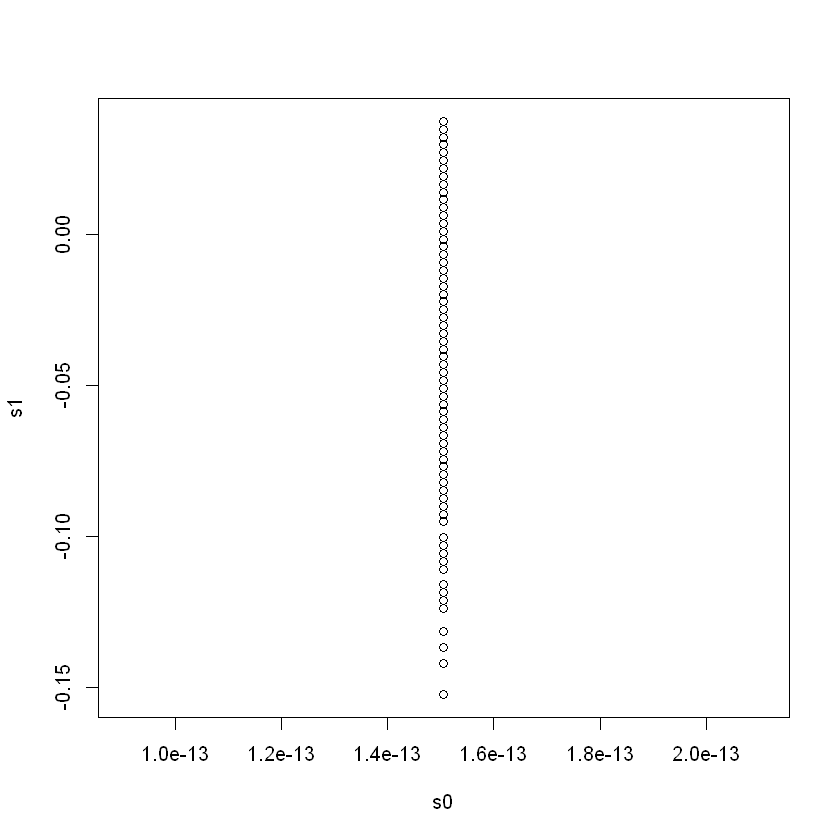

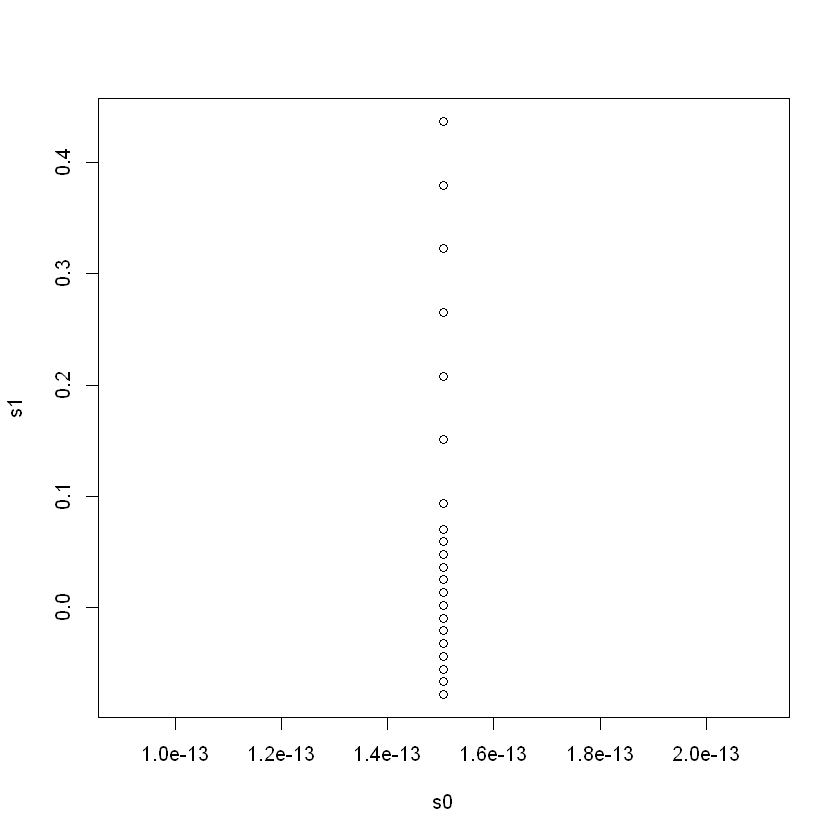

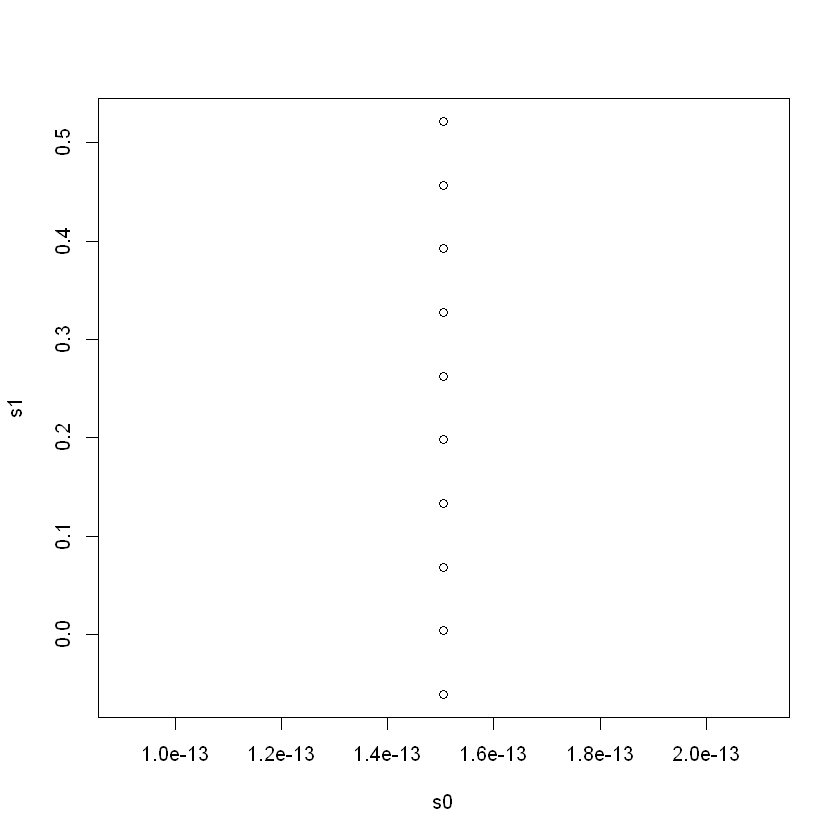

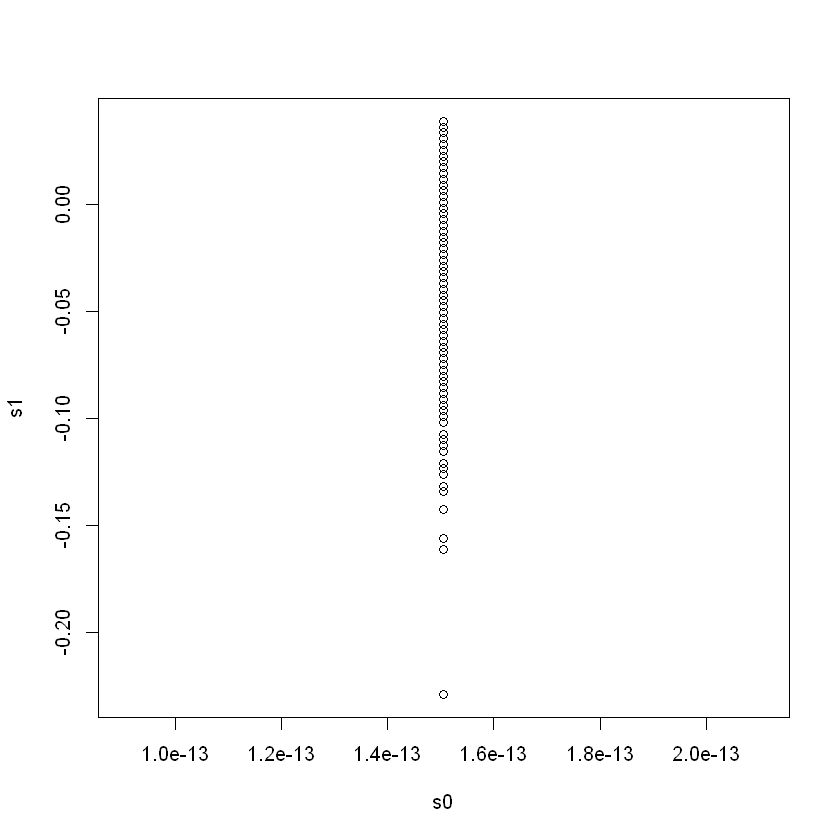

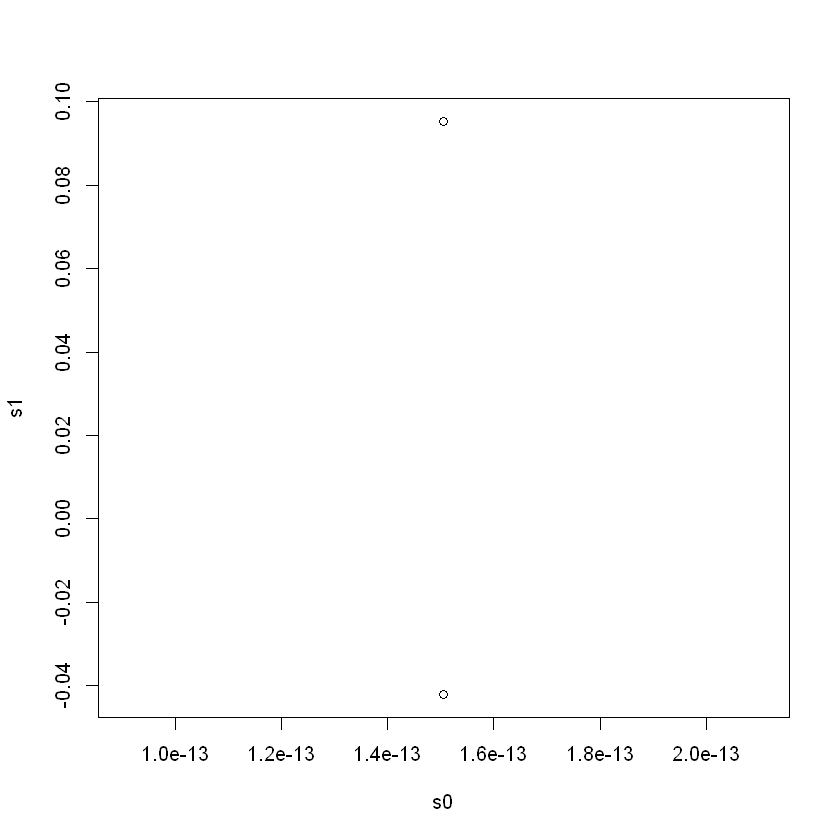

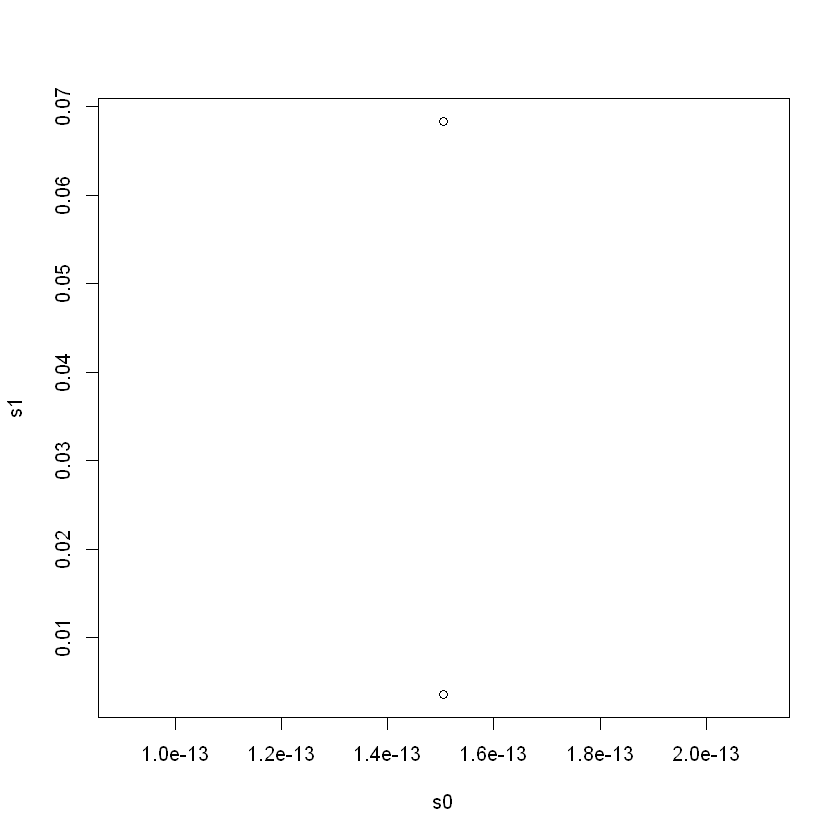

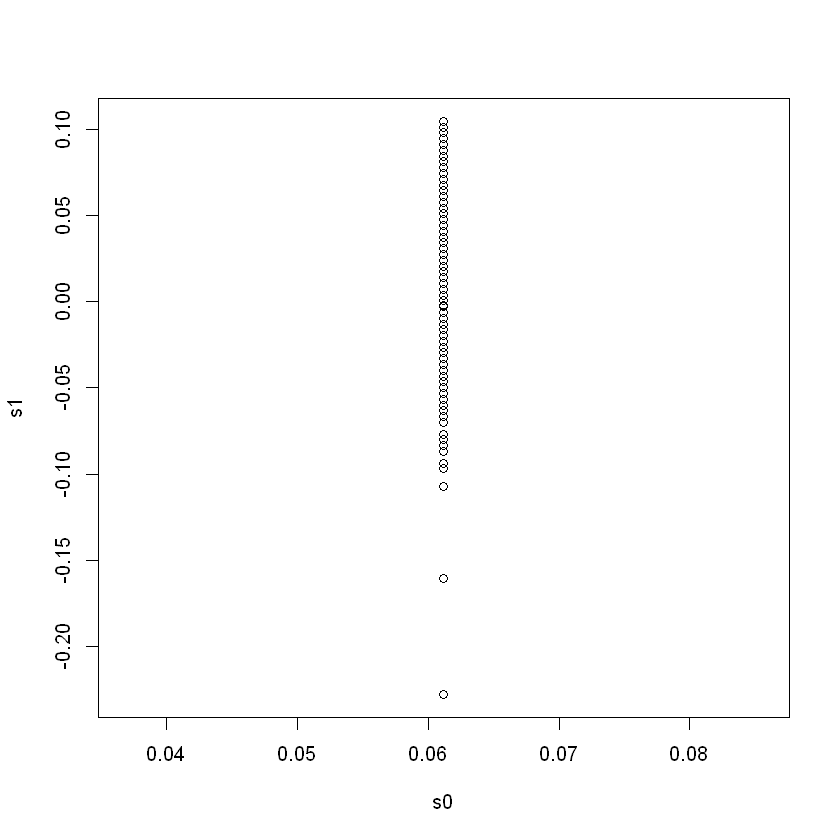

In [35]:
plot(fit.median.tune.predict)
  
plot(fit.knn.tune.predict)
  
plot(fit.complete.tune.predict)
  
plot(bin.fit.median.tune.predict)
  
plot(bin.fit.knn.tune.predict)
  
plot(bin.fit.complete.predict.tune)
  
plot(fit.dummy.predict.tune)

# The tuning done on the glmnet was a loss of standardization of the variables, which led to an increase in the number of variables used in the plots. Binning with complete cases had almost no variables used, and should be considered an outlier.

In [36]:
median.cm.tune
  
knn.cm.tune
  
complete.cm.tune
  
bin.median.cm.tune
  
bin.knn.cm.tune
  
bin.complete.cm.tune
  
dummy.cm.tune

# The rpart trees were tuned by increasing the cross-fold validation value from 10 to 20. Unfortunately, this appeared to have no effect whatsoever.

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1713  943
       Yes  277 1047
                                          
               Accuracy : 0.6935          
                 95% CI : (0.6789, 0.7078)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3869          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5261          
            Specificity : 0.8608          
         Pos Pred Value : 0.7908          
         Neg Pred Value : 0.6450          
             Prevalence : 0.5000          
         Detection Rate : 0.2631          
   Detection Prevalence : 0.3327          
      Balanced Accuracy : 0.6935          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1682  976
       Yes  308 1014
                                          
               Accuracy : 0.6774          
                 95% CI : (0.6626, 0.6919)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3548          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5095          
            Specificity : 0.8452          
         Pos Pred Value : 0.7670          
         Neg Pred Value : 0.6328          
             Prevalence : 0.5000          
         Detection Rate : 0.2548          
   Detection Prevalence : 0.3322          
      Balanced Accuracy : 0.6774          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1307  746
       Yes  179  835
                                          
               Accuracy : 0.6984          
                 95% CI : (0.6818, 0.7146)
    No Information Rate : 0.5155          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4031          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5281          
            Specificity : 0.8795          
         Pos Pred Value : 0.8235          
         Neg Pred Value : 0.6366          
             Prevalence : 0.5155          
         Detection Rate : 0.2723          
   Detection Prevalence : 0.3306          
      Balanced Accuracy : 0.7038          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1632  858
       Yes  358 1132
                                          
               Accuracy : 0.6945          
                 95% CI : (0.6799, 0.7088)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3889          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5688          
            Specificity : 0.8201          
         Pos Pred Value : 0.7597          
         Neg Pred Value : 0.6554          
             Prevalence : 0.5000          
         Detection Rate : 0.2844          
   Detection Prevalence : 0.3744          
      Balanced Accuracy : 0.6945          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1651  863
       Yes  339 1127
                                          
               Accuracy : 0.698           
                 95% CI : (0.6835, 0.7122)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.396           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5663          
            Specificity : 0.8296          
         Pos Pred Value : 0.7688          
         Neg Pred Value : 0.6567          
             Prevalence : 0.5000          
         Detection Rate : 0.2832          
   Detection Prevalence : 0.3683          
      Balanced Accuracy : 0.6980          
                                          
       'Positive' Class : Yes             
                                          

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1594  922
       Yes  263  973
                                        
               Accuracy : 0.6842        
                 95% CI : (0.669, 0.699)
    No Information Rate : 0.5051        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.3705        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.5135        
            Specificity : 0.8584        
         Pos Pred Value : 0.7872        
         Neg Pred Value : 0.6335        
             Prevalence : 0.5051        
         Detection Rate : 0.2593        
   Detection Prevalence : 0.3294        
      Balanced Accuracy : 0.6859        
                                        
       'Positive' Class : Yes           
                                        

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1324  729
       Yes  162  852
                                          
               Accuracy : 0.7095          
                 95% CI : (0.6931, 0.7255)
    No Information Rate : 0.5155          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.425           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5389          
            Specificity : 0.8910          
         Pos Pred Value : 0.8402          
         Neg Pred Value : 0.6449          
             Prevalence : 0.5155          
         Detection Rate : 0.2778          
   Detection Prevalence : 0.3306          
      Balanced Accuracy : 0.7149          
                                          
       'Positive' Class : Yes             
                                          


Call:
C5.0.default(x = median.train[0.1:(ncol(median.train) - 1)], y
 = median.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:14 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0:
:...sepPaymentStatus > 1: Yes (1733/212)
:   sepPaymentStatus <= 1:
:   :...mayPaymentStatus > 0: Yes (299/58)
:       mayPaymentStatus <= 0:
:       :...junPaymentStatus <= -1: No (205/82)
:           junPaymentStatus > -1:
:           :...junPaymentStatus > 1: Yes (106/26)
:               junPaymentStatus <= 1:
:               :...aprPaymentStatus <= -1:
:                   :...julPaymentStatus <= -1: Yes (29/9)
:                   :   julPaymentStatus > -1: No (72/31)
:                   aprPaymentStatus > -1:
:                   :...augPaymentStatus > -1: Yes (603/216)
:                       augPaymentStatus <= -1:
:               


Call:
C5.0.default(x = knn.train[0.1:(ncol(knn.train) - 1)], y =
 knn.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:17 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0.3307757:
:...sepPaymentStatus > 1.213436: Yes (1710/186)
:   sepPaymentStatus <= 1.213436:
:   :...junPaymentStatus <= -1.098185:
:       :...julPaymentStatus <= -0.4426645: No (204/78)
:       :   julPaymentStatus > -0.4426645: Yes (46/16)
:       junPaymentStatus > -1.098185:
:       :...julPaymentStatus > 0.5848945: Yes (505/122)
:           julPaymentStatus <= 0.5848945:
:           :...sepPrevBillStatement <= -0.1662367: Yes (633/227)
:               sepPrevBillStatement > -0.1662367: No (49/17)
sepPaymentStatus <= 0.3307757:
:...augPaymentStatus > 0.8799068: Yes (178/55)
    augPaymentStatus <= 0.8799068:
    :...junPaymentStatus > 0.820147

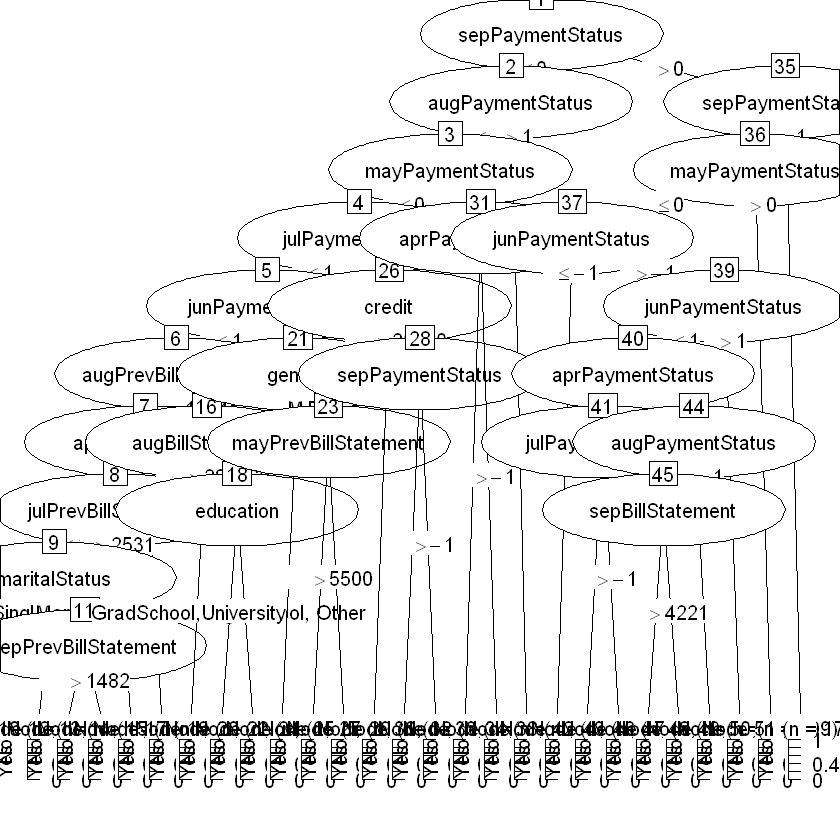


Call:
C5.0.default(x = complete.train[0.1:(ncol(complete.train) - 1)], y
 = complete.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:19 2018
-------------------------------

Class specified by attribute `outcome'

Read 7159 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0:
:...augPaymentStatus > -1: Yes (2311/371)
:   augPaymentStatus <= -1:
:   :...sepPaymentStatus > 1: Yes (45/12)
:       sepPaymentStatus <= 1:
:       :...junPaymentStatus <= 1: No (68/23)
:           junPaymentStatus > 1: Yes (9)
sepPaymentStatus <= 0:
:...augPaymentStatus > 1: Yes (137/43)
    augPaymentStatus <= 1:
    :...junPaymentStatus > 1:
        :...credit <= 220000: Yes (318/115)
        :   credit > 220000: No (35/12)
        junPaymentStatus <= 1:
        :...aprPaymentStatus > 0:
            :...credit <= 20000: Yes (26/5)
            :   credit > 20000: No (194/84)
            aprPaymentStatus <= 0:
            :...

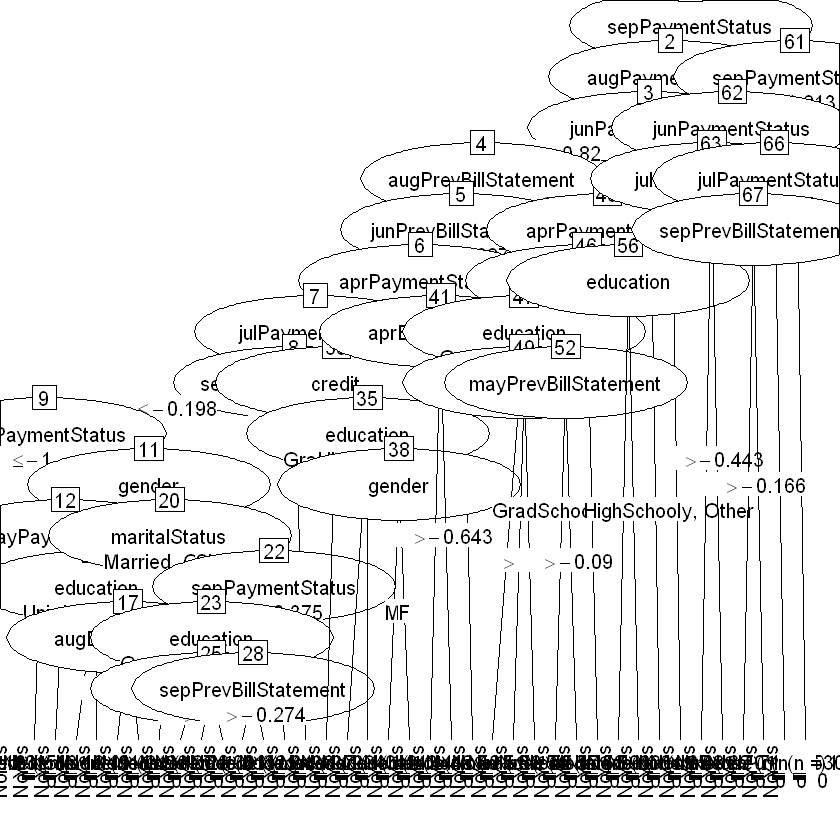


Call:
C5.0.default(x = bin.median.train[0.1:(ncol(bin.median.train) - 1)], y
 = bin.median.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:20 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0:
:...sepBillStatement <= 538:
:   :...junPaymentStatus > 0: Yes (33/7)
:   :   junPaymentStatus <= 0:
:   :   :...junPrevBillStatement <= 178:
:   :       :...gender = M:
:   :       :   :...augPrevBillStatement <= 97: Yes (110/27)
:   :       :   :   augPrevBillStatement > 97: No (11/4)
:   :       :   gender = F:
:   :       :   :...education = Other: Yes (0)
:   :       :       education in {University,HighSchool}:
:   :       :       :...augBillStatement <= 4675: Yes (104/26)
:   :       :       :   augBillStatement > 4675: No (7)
:   :       :       education = GradSchool:
:   :       :       :...maritalStatus = Other: N

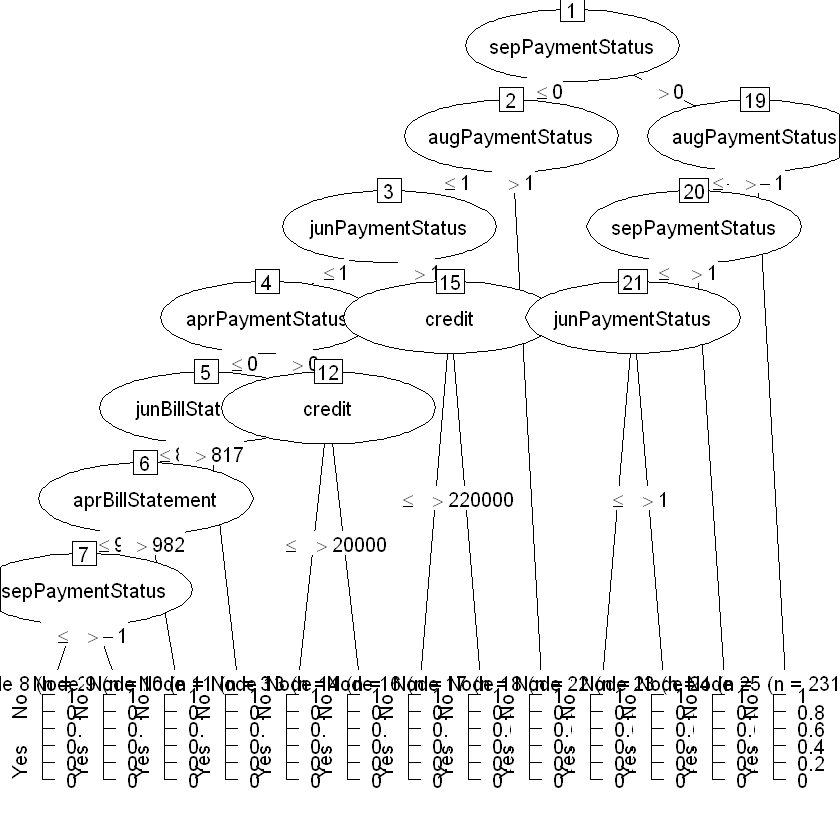


Call:
C5.0.default(x = bin.knn.train[0.1:(ncol(knn.train) - 1)], y
 = bin.knn.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:23 2018
-------------------------------

Class specified by attribute `outcome'

Read 9292 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > -0.7061214:
:...sepBillStatement > -0.6793006:
:   :...sepPrevBillStatement <= 0.6321223:
:   :   :...augPaymentStatus > -0.5442408: Yes (1932/354)
:   :   :   augPaymentStatus <= -0.5442408:
:   :   :   :...sepPrevBillStatement > -0.2553307: Yes (516/63)
:   :   :       sepPrevBillStatement <= -0.2553307:
:   :   :       :...age <= -1.118883: Yes (6)
:   :   :           age > -1.118883: No (22/7)
:   :   sepPrevBillStatement > 0.6321223:
:   :   :...mayBillStatement > 0.8063101: Yes (16/1)
:   :       mayBillStatement <= 0.8063101:
:   :       :...maritalStatus in {Single,Other}: No (21/2)
:   :           maritalStatus = Married:
:   :    

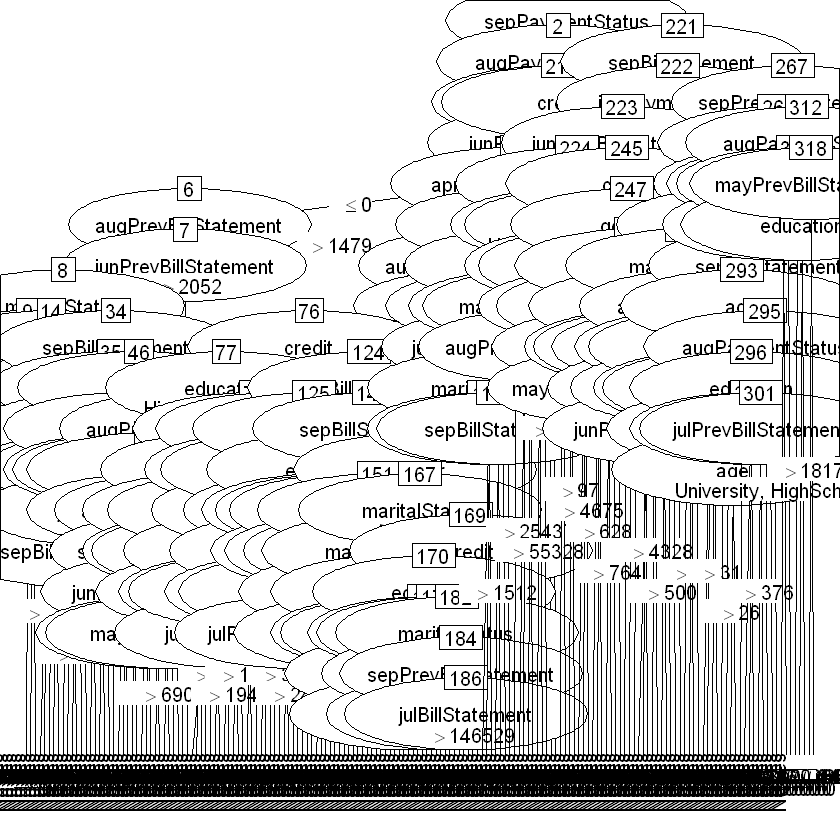


Call:
C5.0.default(x = bin.complete.train[0.1:(ncol(bin.complete.train) - 1)], y
 = bin.complete.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:25 2018
-------------------------------

Class specified by attribute `outcome'

Read 8759 cases (23 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0:
:...education = Other: No (3)
:   education in {GradSchool,University,HighSchool}:
:   :...sepBillStatement > 577: Yes (2438/408)
:       sepBillStatement <= 577:
:       :...augPrevBillStatement <= 328: Yes (364/123)
:           augPrevBillStatement > 328:
:           :...education = University:
:               :...aprBillStatement <= 873: Yes (24/11)
:               :   aprBillStatement > 873: No (14/1)
:               education = GradSchool:
:               :...credit > 330000: No (15/2)
:               :   credit <= 330000:
:               :   :...junPrevBillStatement <= 7700: No (48/22)
:               :       jun

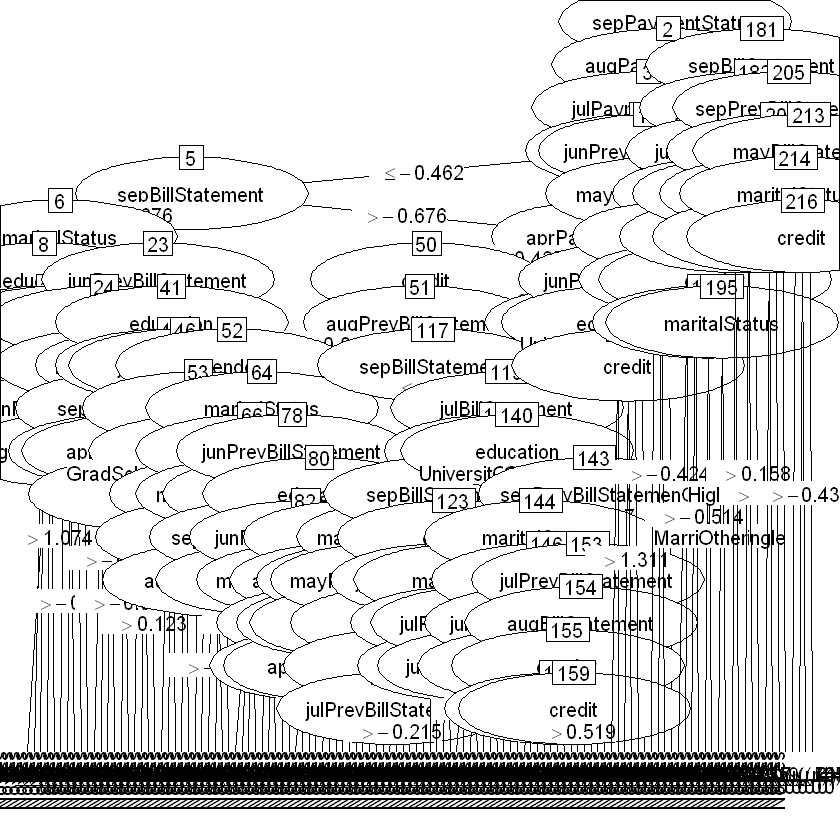


Call:
C5.0.default(x = dummy.train[0.1:(ncol(dummy.train) - 1)], y
 = dummy.train$target, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Wed Dec 19 20:01:27 2018
-------------------------------

Class specified by attribute `outcome'

Read 7159 cases (29 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

sepPaymentStatus > 0:
:...junPaymentStatus > -1: Yes (2311/387)
:   junPaymentStatus <= -1:
:   :...augPrevBillStatement <= 3071: Yes (101/39)
:       augPrevBillStatement > 3071: No (21/2)
sepPaymentStatus <= 0:
:...julPaymentStatus > 1: Yes (420/154)
    julPaymentStatus <= 1:
    :...augPaymentStatus > 1: Yes (72/22)
        augPaymentStatus <= 1:
        :...junPaymentStatus > 1: Yes (215/102)
            junPaymentStatus <= 1:
            :...sepBillStatement <= 1319:
                :...mayBillStatement <= 2016: Yes (241/103)
                :   mayBillStatement > 2016: No (112/39)
                sepBillStatement > 1319:
                :...aprPaymentSta

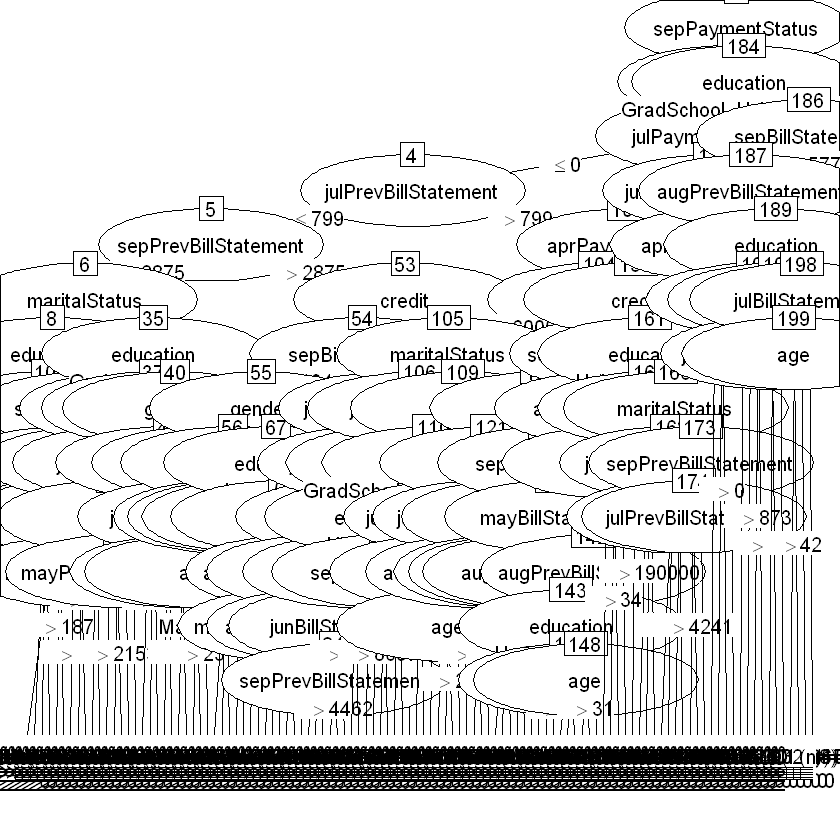

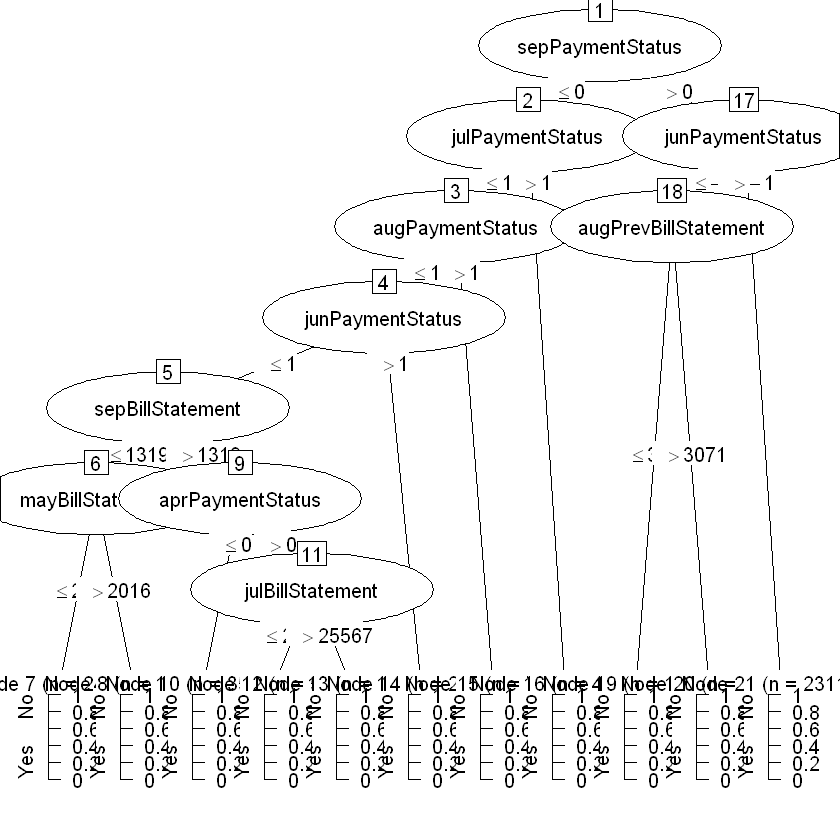

In [37]:
summary(C5.0.tree.median.tune)
plot(C5.0.tree.median.tune)
  
summary(C5.0.tree.knn.tune)
plot(C5.0.tree.knn.tune)
  
summary(C5.0.tree.complete.tune)
plot(C5.0.tree.complete.tune)
  
summary(bin.C5.0.tree.median.tune)
plot(bin.C5.0.tree.median.tune)
  
summary(bin.C5.0.tree.knn.tune)
plot(bin.C5.0.tree.knn.tune)
  
summary(bin.C5.0.tree.complete.tune)
plot(bin.C5.0.tree.complete.tune)
  
summary(C5.0.tree.dummy.tune)
plot(C5.0.tree.dummy.tune)

# Once again, binning created extremely large tree, but lead to better results. The best result was by the binning using only complete cases.

In [38]:
model7median.tune[[4]][c(2:4,6)]
model7knn.tune[[4]][c(2:4,6)]
model7complete.tune[[4]][c(2:4,6)]
bin.model7median.tune[[4]][c(2:4,6)]
bin.model7knn.tune[[4]][c(2:4,6)]
bin.model7complete.tune[[4]][c(2:4,6)]
model7dummy.tune[[4]][c(2:4,6)]

# Overall, the Gini splitting role is better than the Extra Trees rule. Median impute works bad for Ranger models, and simply not imputing is overall a good idea. Removing all missing values is the best idea. Dummy variables seem to work pretty well.

splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7051218,0.01150003
gini,2,0.7067354,0.01264900
gini,3,0.7047995,0.01067201
extratrees,1,0.7042640,0.01341342
extratrees,2,0.7051230,0.01506787
extratrees,3,0.7045860,0.01315776


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7108258,0.01259772
gini,2,0.7103949,0.01232483
gini,3,0.7098575,0.01467670
extratrees,1,0.7094275,0.01115954
extratrees,2,0.7087824,0.01351617
extratrees,3,0.7083508,0.01283722


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7228646,0.01522464
gini,2,0.7220264,0.01546376
gini,3,0.7224454,0.01430068
extratrees,1,0.7257995,0.01490161
extratrees,2,0.7249607,0.01314529
extratrees,3,0.7241222,0.01450156


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7053366,0.01427123
gini,2,0.7072737,0.01488409
gini,3,0.7088869,0.01431223
extratrees,1,0.7041532,0.01713760
extratrees,2,0.7035069,0.01585225
extratrees,3,0.7030758,0.01578814


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7100837,0.02102021
gini,2,0.7102991,0.02135778
gini,3,0.7094377,0.02227962
extratrees,1,0.7039475,0.01745329
extratrees,2,0.7035171,0.01798897
extratrees,3,0.7029789,0.01802098


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7102443,0.01256594
gini,2,0.7109251,0.01376103
gini,3,0.7124115,0.01311002
extratrees,1,0.7065871,0.01319297
extratrees,2,0.7065872,0.01442623
extratrees,3,0.7087567,0.01287923


splitrule,min.node.size,Accuracy,AccuracySD
gini,1,0.7223116,0.01281149
gini,2,0.7224499,0.01042114
gini,3,0.7232881,0.01073495
extratrees,1,0.7142106,0.01546907
extratrees,2,0.7142105,0.01495935
extratrees,3,0.7150486,0.01538409


In [51]:
# In the end, the superior model appeared to be the C5.0 algorithm while binning some variables, whether by using the median impute imputation method, or removing all missing values. Both cases have their advantages and disadvantages. The tuning on these models used was to do 10 boosting iterations, which progressively decreased the error rates of the models, and created smaller trees.